In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [18]:
import os

# List all directories in the specified path
logs_path = '/simurgh/u/akhatua/moderation_protocol/logs_real_world'
games = [d for d in os.listdir(logs_path) if os.path.isdir(os.path.join(logs_path, d))]
games

['Hawk-Dove Game',
 'Stag Hunt Game',
 "Prisoner's Dilemma",
 'Battle of the Sexes',
 'Deadlock Game']

In [19]:
import os

# Path to the main logs directory
logs_path = '/simurgh/u/akhatua/moderation_protocol/logs_real_world'

# List all directories in the main logs path
games = [d for d in os.listdir(logs_path) if os.path.isdir(os.path.join(logs_path, d))]

# Create a dictionary to hold the directories inside each game directory
game_dirs = {}

# Iterate through each game directory
for game in games:
    game_path = os.path.join(logs_path, game)
    # List all directories inside the current game directory
    inner_dirs = [d for d in os.listdir(game_path) if os.path.isdir(os.path.join(game_path, d))]
    game_dirs[game] = inner_dirs

# Print the results
for game, dirs in game_dirs.items():
    print(f"Game: {game}")
    print("Directories:", dirs)

Game: Hawk-Dove Game
Directories: ['Company Patent Disputes', 'Traffic Lane Merging', 'Farmland Water Access', 'Corporate Talent Recruitment', 'Neighborhood Parking Spot Allocation', 'Office Resource Allocation', 'Open-Source Software Contributions', 'Political Campaign Strategies', 'Public Park Usage', 'Urban Bicycle Sharing Programs']
Game: Stag Hunt Game
Directories: ['Online Content Collaboration', 'Food Supply Chain', 'Startup Networking Events', 'Climate Change Mitigation', 'Academic Publishing', 'Local Community Projects', 'Humanitarian Aid Efforts', 'Open Source Software Development', 'Urban Transportation Planning', 'Cross-Border Tourism Promotion']
Game: Prisoner's Dilemma
Directories: ['Corporate Price Competition', 'Pharmaceutical Development', 'Environmental Conservation Effort', 'Political Election Campaign', 'Corporate Data Privacy', 'Cybersecurity Collaboration', 'Military Arms Race', 'International Trade Agreements', 'Technology Industry Competition', 'Urban Developmen

In [5]:
game_type = "Prisoner's Dilemma"
total_points = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
min_points = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
equality = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
quantitative = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
qualitative = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}


for game in game_dirs[game_type]:
    print(game)
    
    max_points = 50
    min = 0
    idx = 0
    for num_conversation_rounds in [1, 2, 3, 4, 5, 6, 7]:
        for include_moderator in [False, True]:
            for i in range(2):
                # print(f'./logs_real_world/{game_type}/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
                df = pd.read_csv(f'./logs_real_world/{game_type}/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
        
                # Normalize points_A and points_B
                df['points_A'] = (df['points_A'] - min) / (max_points - min)
                df['points_B'] = (df['points_B'] - min) / (max_points - min)
                df['T_A'] = df['T_A']/10
                df['T_B'] = df['T_B']/10
                
                
                df['total_points'] = df['points_A'] + df['points_B']
                df['min_points'] = df[['points_A', 'points_B']].min(axis=1)
                df['quantitative'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B'])
                df['qualitative'] = 1*(df['T_A'] + df['T_B'])
                df['equality'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B']) + 1*(df['T_A'] + df['T_B'])
                total_points[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['total_points']
                min_points[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['min_points']
                quantitative[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['quantitative']
                qualitative[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['qualitative']
                equality[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['equality']
        idx += 1
                

for game in game_dirs[game_type]:
    quantitative_flat = quantitative[game].flatten()
    qualitative_flat = qualitative[game].flatten()
    
    correlation_matrix = np.corrcoef(quantitative_flat, qualitative_flat)
    correlation = correlation_matrix[0, 1]  # Get the correlation coefficient
    print("GAME: ", game)
    print("Correlation coefficient:", correlation)

Corporate Price Competition
Pharmaceutical Development
Environmental Conservation Effort
Political Election Campaign
Corporate Data Privacy
Cybersecurity Collaboration
Military Arms Race
International Trade Agreements
Technology Industry Competition
Urban Development Projects
GAME:  Corporate Price Competition
Correlation coefficient: 0.1876750759174773
GAME:  Pharmaceutical Development
Correlation coefficient: 0.009492986282796623
GAME:  Environmental Conservation Effort
Correlation coefficient: 0.2886181137976051
GAME:  Political Election Campaign
Correlation coefficient: 0.436011183983818
GAME:  Corporate Data Privacy
Correlation coefficient: 0.35495177268052475
GAME:  Cybersecurity Collaboration
Correlation coefficient: 0.7305009769966283
GAME:  Military Arms Race
Correlation coefficient: 0.23612212667385032
GAME:  International Trade Agreements
Correlation coefficient: 0.7324365533514382
GAME:  Technology Industry Competition
Correlation coefficient: 0.0752042454831567
GAME:  Urba

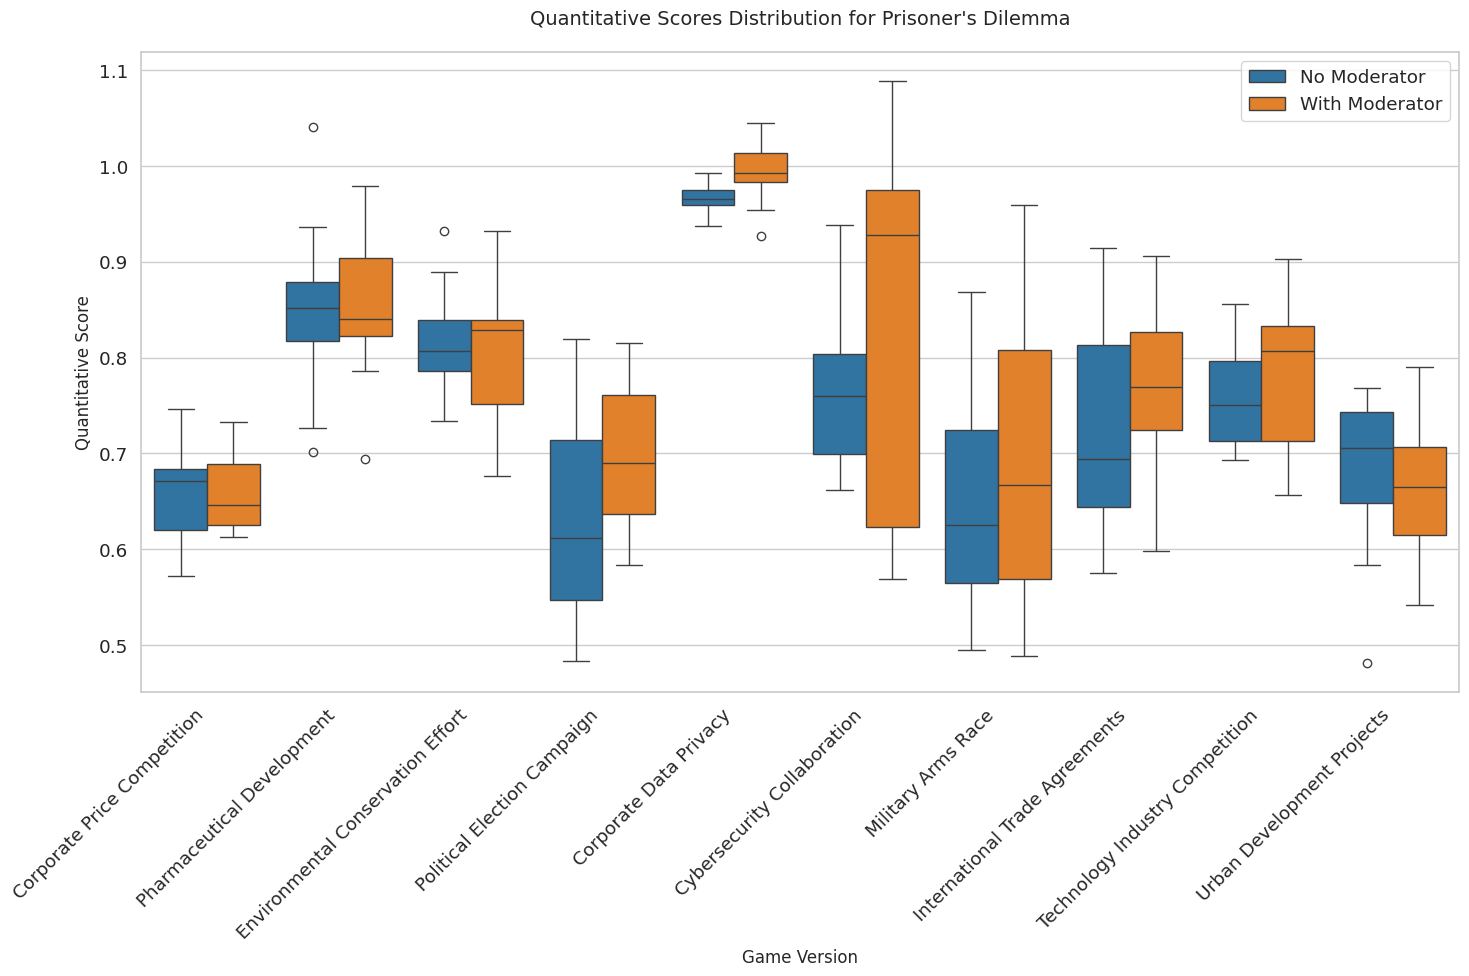

In [10]:
# Create a figure
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
custom_palette = ['#1f77b4', '#ff7f0e']

# Prepare data for plotting
plot_data = []
for game in game_dirs[game_type]:
    # Get all data points across conversation rounds and trials
    for condition, idx in [('No Moderator', 0), ('With Moderator', 1)]:
        # Reshape the data to get all points in a single array
        all_scores = quantitative[game][:, idx, :].flatten()
        
        # Add each score as a separate row
        for score in all_scores:
            plot_data.append({
                'Game': game,
                'Condition': condition,
                'Score': score
            })

# Create DataFrame
df = pd.DataFrame(plot_data)

# Create boxplot
ax = sns.boxplot(
    data=df,
    x='Game',
    y='Score',
    hue='Condition',
    palette=custom_palette,
    width=0.8
)

# Customize plot
plt.title(f'Quantitative Scores Distribution for {game_type}', pad=20, fontsize=14)
plt.xlabel('Game Version', fontsize=12)
plt.ylabel('Quantitative Score', fontsize=12)
plt.legend(title=None, frameon=True)

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Save and show plot
plt.savefig(f'plots/{game_type}_quantitative_boxplot.pdf', bbox_inches='tight')
plt.show()

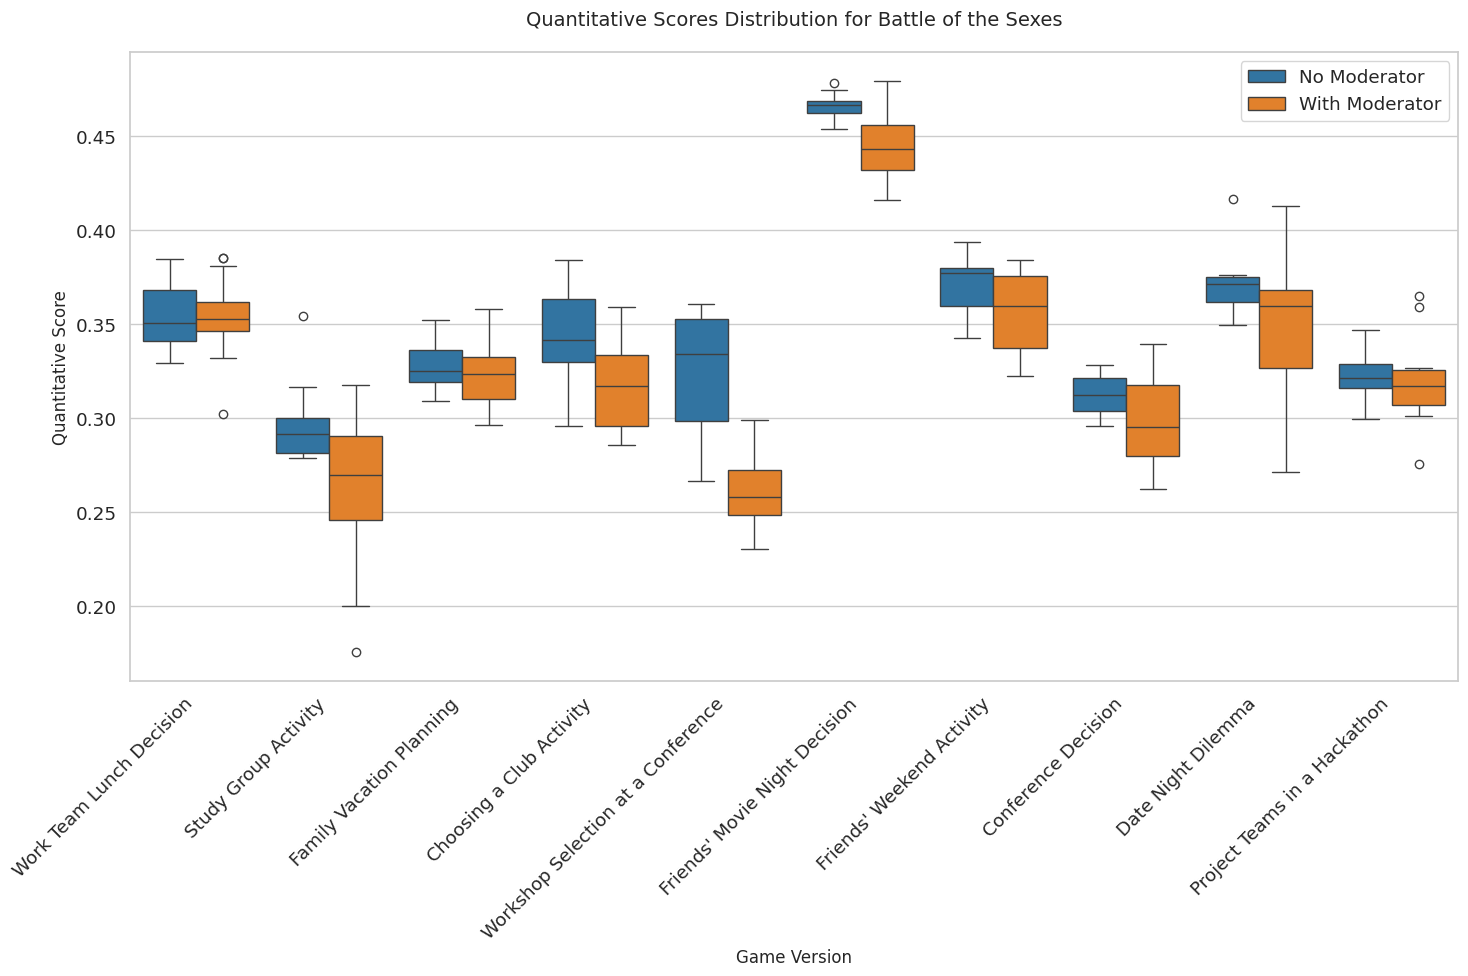

In [11]:
game_type = "Battle of the Sexes"
total_points = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
min_points = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
equality = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
quantitative = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
qualitative = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}


for game in game_dirs[game_type]:
    # print(game)
    
    max_points = 50
    min = 0
    idx = 0
    for num_conversation_rounds in [1, 2, 3, 4, 5, 6, 7]:
        for include_moderator in [False, True]:
            for i in range(2):
                # print(f'./logs_real_world/{game_type}/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
                df = pd.read_csv(f'./logs_real_world/{game_type}/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
        
                # Normalize points_A and points_B
                df['points_A'] = (df['points_A'] - min) / (max_points - min)
                df['points_B'] = (df['points_B'] - min) / (max_points - min)
                df['T_A'] = df['T_A']/10
                df['T_B'] = df['T_B']/10
                
                
                df['total_points'] = df['points_A'] + df['points_B']
                df['min_points'] = df[['points_A', 'points_B']].min(axis=1)
                df['quantitative'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B'])
                df['qualitative'] = 1*(df['T_A'] + df['T_B'])
                df['equality'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B']) + 1*(df['T_A'] + df['T_B'])
                total_points[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['total_points']
                min_points[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['min_points']
                quantitative[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['quantitative']
                qualitative[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['qualitative']
                equality[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['equality']
        idx += 1



# Create a figure
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
custom_palette = ['#1f77b4', '#ff7f0e']

# Prepare data for plotting
plot_data = []
for game in game_dirs[game_type]:
    # Get all data points across conversation rounds and trials
    for condition, idx in [('No Moderator', 0), ('With Moderator', 1)]:
        # Reshape the data to get all points in a single array
        all_scores = quantitative[game][:, idx, :].flatten()
        
        # Add each score as a separate row
        for score in all_scores:
            plot_data.append({
                'Game': game,
                'Condition': condition,
                'Score': score
            })

# Create DataFrame
df = pd.DataFrame(plot_data)

# Create boxplot
ax = sns.boxplot(
    data=df,
    x='Game',
    y='Score',
    hue='Condition',
    palette=custom_palette,
    width=0.8
)

# Customize plot
plt.title(f'Quantitative Scores Distribution for {game_type}', pad=20, fontsize=14)
plt.xlabel('Game Version', fontsize=12)
plt.ylabel('Quantitative Score', fontsize=12)
plt.legend(title=None, frameon=True)

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Save and show plot
plt.savefig(f'plots/{game_type}_quantitative_boxplot.pdf', bbox_inches='tight')
plt.show()

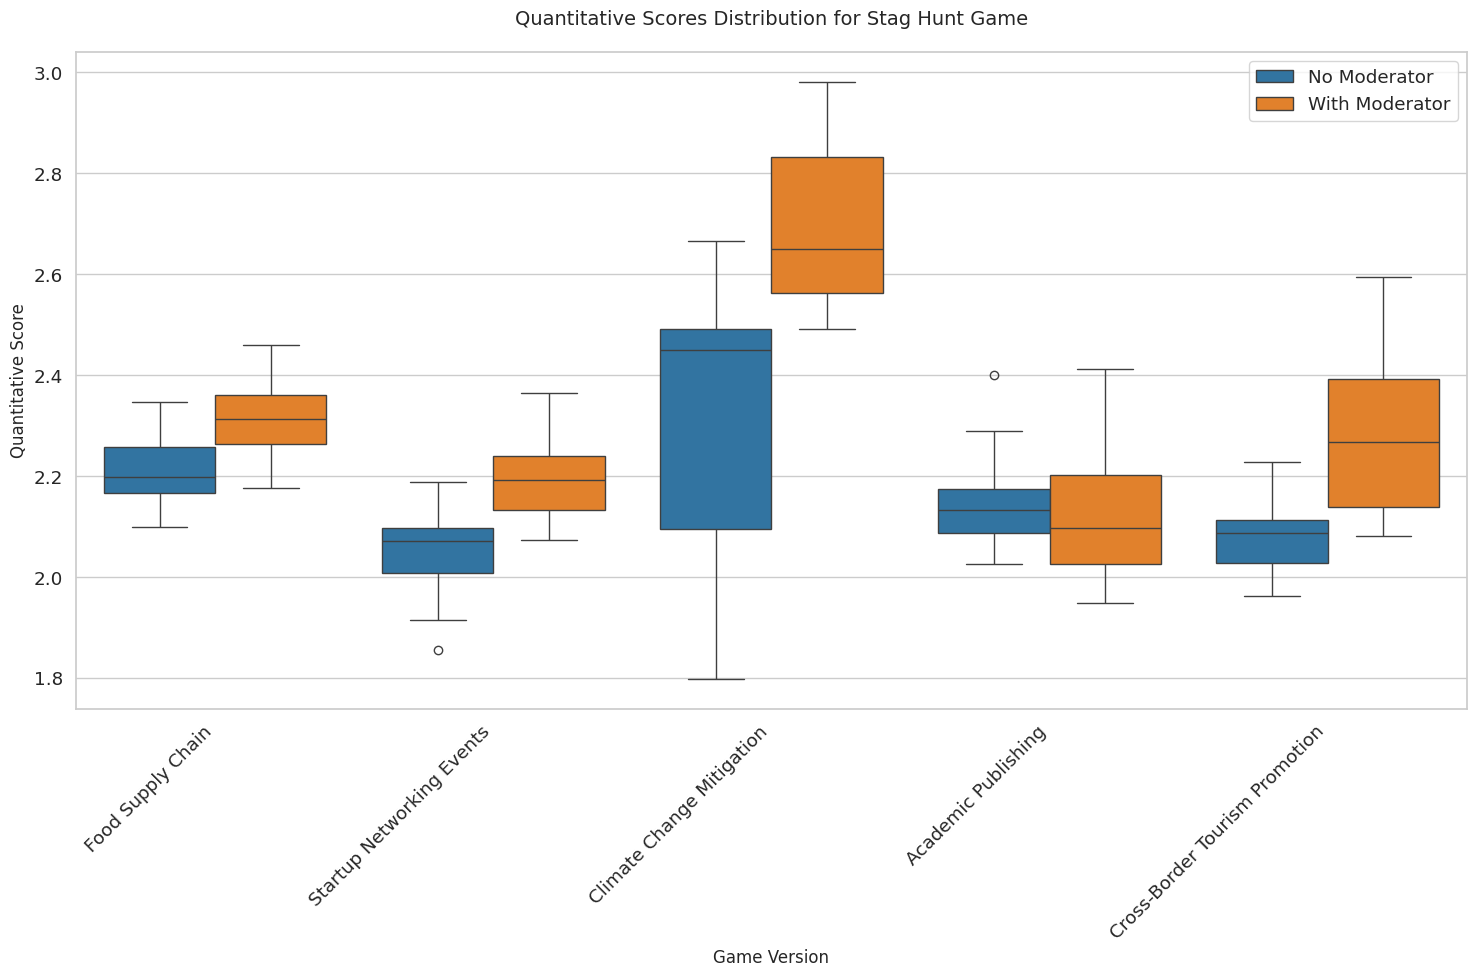

In [20]:
game_type = "Stag Hunt Game"


game_dirs[game_type] = [game for idx, game in enumerate(game_dirs[game_type]) if idx in (1,2,3,4,9)]
total_points = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
min_points = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
equality = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
quantitative = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
qualitative = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}

for idx, game in enumerate(game_dirs[game_type]):
        
    # print(game)
    
    max_points = 50
    min = 0
    idx = 0
    for num_conversation_rounds in [1, 2, 3, 4, 5, 6, 7]:
        for include_moderator in [False, True]:
            for i in range(2):
                # print(f'./logs_real_world/{game_type}/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
                df = pd.read_csv(f'./logs_real_world/{game_type}/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
        
                # Normalize points_A and points_B
                df['points_A'] = (df['points_A'] - min) / (max_points - min)
                df['points_B'] = (df['points_B'] - min) / (max_points - min)
                df['T_A'] = df['T_A']/10
                df['T_B'] = df['T_B']/10
                
                
                df['total_points'] = df['points_A'] + df['points_B']
                df['min_points'] = df[['points_A', 'points_B']].min(axis=1)
                df['quantitative'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B'])
                df['qualitative'] = 1*(df['T_A'] + df['T_B'])
                df['equality'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B']) + 1*(df['T_A'] + df['T_B'])
                total_points[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['total_points']
                min_points[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['min_points']
                quantitative[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['quantitative']
                qualitative[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['qualitative']
                equality[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['equality']
        idx += 1




# Create a figure
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
custom_palette = ['#1f77b4', '#ff7f0e']

# Prepare data for plotting
plot_data = []
for game in game_dirs[game_type]:
    # Get all data points across conversation rounds and trials
    for condition, idx in [('No Moderator', 0), ('With Moderator', 1)]:
        # Reshape the data to get all points in a single array
        all_scores = quantitative[game][:, idx, :].flatten()
        
        # Add each score as a separate row
        for score in all_scores:
            plot_data.append({
                'Game': game,
                'Condition': condition,
                'Score': score
            })

# Create DataFrame
df = pd.DataFrame(plot_data)

# Create boxplot
ax = sns.boxplot(
    data=df,
    x='Game',
    y='Score',
    hue='Condition',
    palette=custom_palette,
    width=0.8
)

# Customize plot
plt.title(f'Quantitative Scores Distribution for {game_type}', pad=20, fontsize=14)
plt.xlabel('Game Version', fontsize=12)
plt.ylabel('Quantitative Score', fontsize=12)
plt.legend(title=None, frameon=True)

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Save and show plot
plt.savefig(f'plots/{game_type}_quantitative_boxplot.pdf', bbox_inches='tight')
plt.show()

In [ ]:
game_type = "Stag Hunt Game"


game_dirs[game_type] = [game for idx, game in enumerate(game_dirs[game_type]) if idx in (1,2,3,4,9)]
total_points = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
min_points = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
equality = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
quantitative = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
qualitative = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}

for idx, game in enumerate(game_dirs[game_type]):
        
    # print(game)
    
    max_points = 50
    min = 0
    idx = 0
    for num_conversation_rounds in [1, 2, 3, 4, 5, 6, 7]:
        for include_moderator in [False, True]:
            for i in range(2):
                # print(f'./logs_real_world/{game_type}/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
                df = pd.read_csv(f'./logs_real_world/{game_type}/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
        
                # Normalize points_A and points_B
                df['points_A'] = (df['points_A'] - min) / (max_points - min)
                df['points_B'] = (df['points_B'] - min) / (max_points - min)
                df['T_A'] = df['T_A']/10
                df['T_B'] = df['T_B']/10
                
                
                df['total_points'] = df['points_A'] + df['points_B']
                df['min_points'] = df[['points_A', 'points_B']].min(axis=1)
                df['quantitative'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B'])
                df['qualitative'] = 1*(df['T_A'] + df['T_B'])
                df['equality'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B']) + 1*(df['T_A'] + df['T_B'])
                total_points[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['total_points']
                min_points[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['min_points']
                quantitative[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['quantitative']
                qualitative[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['qualitative']
                equality[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['equality']
        idx += 1




# Create a figure
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
custom_palette = ['#1f77b4', '#ff7f0e']

# Prepare data for plotting
plot_data = []
for game in game_dirs[game_type]:
    # Get all data points across conversation rounds and trials
    for condition, idx in [('No Moderator', 0), ('With Moderator', 1)]:
        # Reshape the data to get all points in a single array
        all_scores = quantitative[game][:, idx, :].flatten()
        
        # Add each score as a separate row
        for score in all_scores:
            plot_data.append({
                'Game': game,
                'Condition': condition,
                'Score': score
            })

# Create DataFrame
df = pd.DataFrame(plot_data)

# Create boxplot
ax = sns.boxplot(
    data=df,
    x='Game',
    y='Score',
    hue='Condition',
    palette=custom_palette,
    width=0.8
)

# Customize plot
plt.title(f'Quantitative Scores Distribution for {game_type}', pad=20, fontsize=14)
plt.xlabel('Game Version', fontsize=12)
plt.ylabel('Quantitative Score', fontsize=12)
plt.legend(title=None, frameon=True)

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Save and show plot
plt.savefig(f'plots/{game_type}_quantitative_boxplot.pdf', bbox_inches='tight')
plt.show()

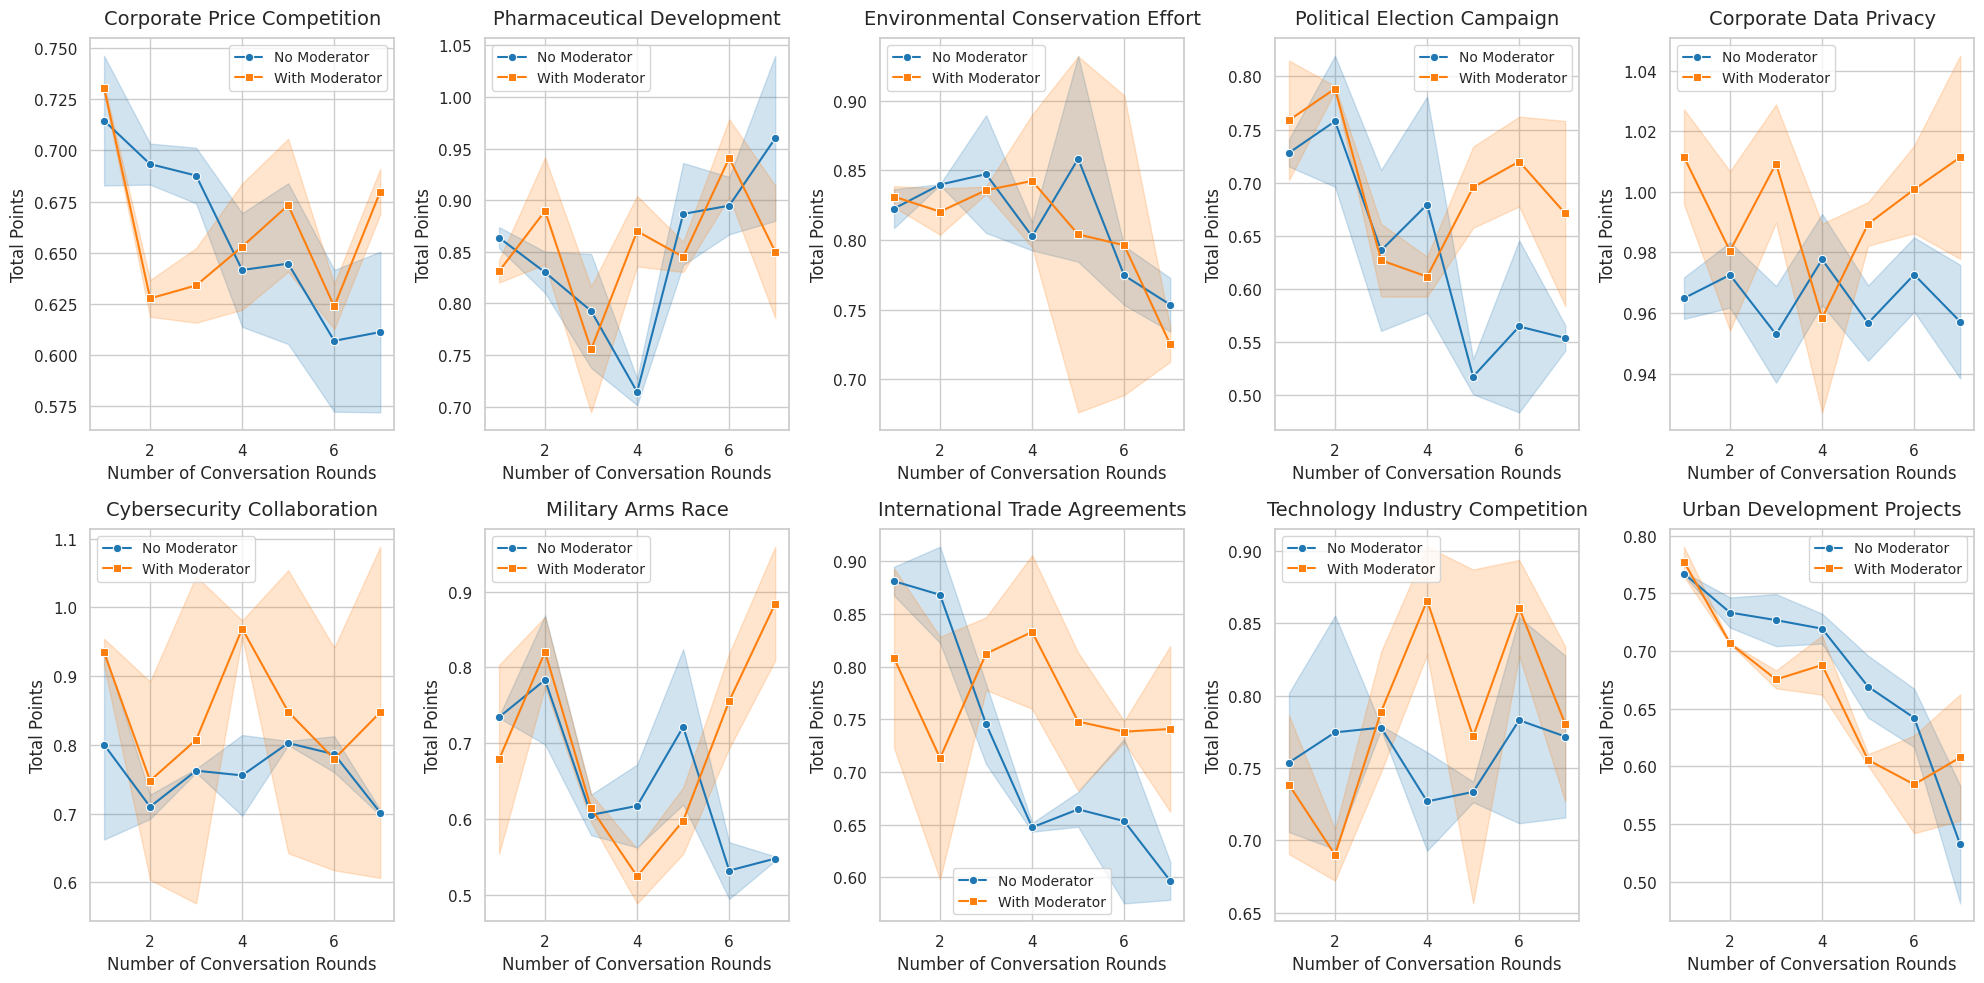

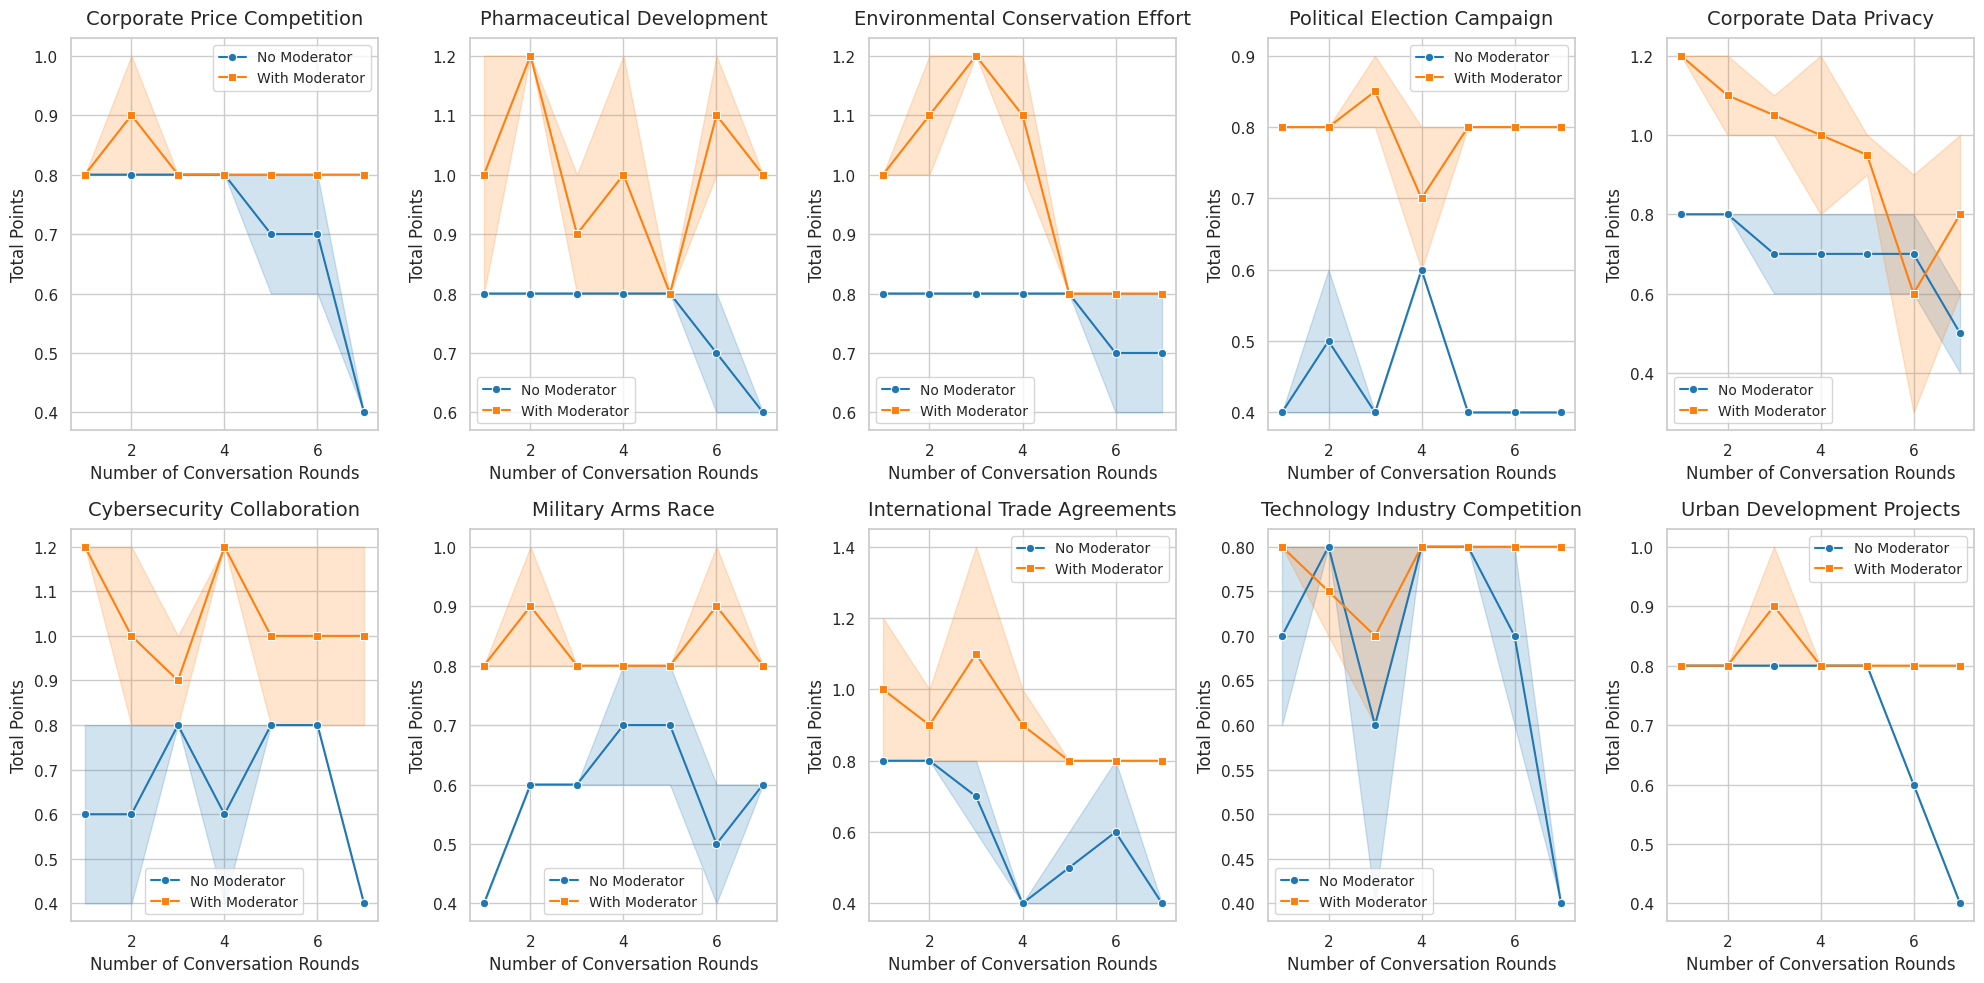

In [42]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.0)  # Adjust font scale if needed
custom_palette = ['#1f77b4', '#ff7f0e']

# Create a figure with subplots
num_games = len(game_dirs[game_type])  # Number of games to plot
num_cols = 5  # Number of subplots per row
num_rows = (num_games + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  # Adjust figsize

# Flatten axes array for easy iteration
axes = axes.flatten()

for ax, game in zip(axes, game_dirs[game_type]):
    # Create DataFrame for seaborn
    plot_data = []
    for idx, condition in enumerate(['No Moderator', 'With Moderator']):
        means = quantitative[game].mean(axis=-1)[:, idx]
        std_devs = quantitative[game].std(axis=-1)[:, idx]
        rounds = np.arange(1, len(means) + 1)
        
        for round_num, mean, std in zip(rounds, means, std_devs):
            plot_data.append({
                'Round': round_num,
                'Points': mean,
                'Std': std,
                'Condition': condition
            })
    
    df = pd.DataFrame(plot_data)
    
    # Create the line plot on the current axis
    sns.lineplot(
        data=df,
        x='Round',
        y='Points',
        hue='Condition',
        style='Condition',
        palette=custom_palette,
        markers=['o', 's'],
        dashes=False,
        ax=ax  # Specify the current axis
    )

    # Add colored error boundaries
    for condition in ['No Moderator', 'With Moderator']:
        condition_data = df[df['Condition'] == condition]
        ax.fill_between(
            condition_data['Round'],
            condition_data['Points'] - condition_data['Std'],
            condition_data['Points'] + condition_data['Std'],
            alpha=0.2,  # lighter transparency
            color=ax.get_lines()[['No Moderator', 'With Moderator'].index(condition)].get_color()
        )

    ax.set_title(game, fontsize=14, pad=10)  # Reduce title font size
    ax.set_xlabel('Number of Conversation Rounds', fontsize=12)  # Reduce label font size
    ax.set_ylabel('Total Points', fontsize=12)  # Reduce label font size
    ax.legend(title=None, frameon=True, fontsize=10)  # Reduce legend font size

# Hide any unused subplots
for i in range(num_games, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust space between subplots
plt.savefig(f'plots/{game_type}_combined_plot.pdf')  # Save the combined plot as a PDF
plt.show()




import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.0)  # Adjust font scale if needed
custom_palette = ['#1f77b4', '#ff7f0e']

# Create a figure with subplots
num_games = len(game_dirs[game_type])  # Number of games to plot
num_cols = 5  # Number of subplots per row
num_rows = (num_games + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  # Adjust figsize

# Flatten axes array for easy iteration
axes = axes.flatten()

for ax, game in zip(axes, game_dirs[game_type]):
    # Create DataFrame for seaborn
    plot_data = []
    for idx, condition in enumerate(['No Moderator', 'With Moderator']):
        means = qualitative[game].mean(axis=-1)[:, idx]
        std_devs = qualitative[game].std(axis=-1)[:, idx]
        rounds = np.arange(1, len(means) + 1)
        
        for round_num, mean, std in zip(rounds, means, std_devs):
            plot_data.append({
                'Round': round_num,
                'Points': mean,
                'Std': std,
                'Condition': condition
            })
    
    df = pd.DataFrame(plot_data)
    
    # Create the line plot on the current axis
    sns.lineplot(
        data=df,
        x='Round',
        y='Points',
        hue='Condition',
        style='Condition',
        palette=custom_palette,
        markers=['o', 's'],
        dashes=False,
        ax=ax  # Specify the current axis
    )

    # Add colored error boundaries
    for condition in ['No Moderator', 'With Moderator']:
        condition_data = df[df['Condition'] == condition]
        ax.fill_between(
            condition_data['Round'],
            condition_data['Points'] - condition_data['Std'],
            condition_data['Points'] + condition_data['Std'],
            alpha=0.2,  # lighter transparency
            color=ax.get_lines()[['No Moderator', 'With Moderator'].index(condition)].get_color()
        )

    ax.set_title(game, fontsize=14, pad=10)  # Reduce title font size
    ax.set_xlabel('Number of Conversation Rounds', fontsize=12)  # Reduce label font size
    ax.set_ylabel('Total Points', fontsize=12)  # Reduce label font size
    ax.legend(title=None, frameon=True, fontsize=10)  # Reduce legend font size

# Hide any unused subplots
for i in range(num_games, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust space between subplots
plt.savefig(f'plots/{game_type}_combined_plot.pdf')  # Save the combined plot as a PDF
plt.show()

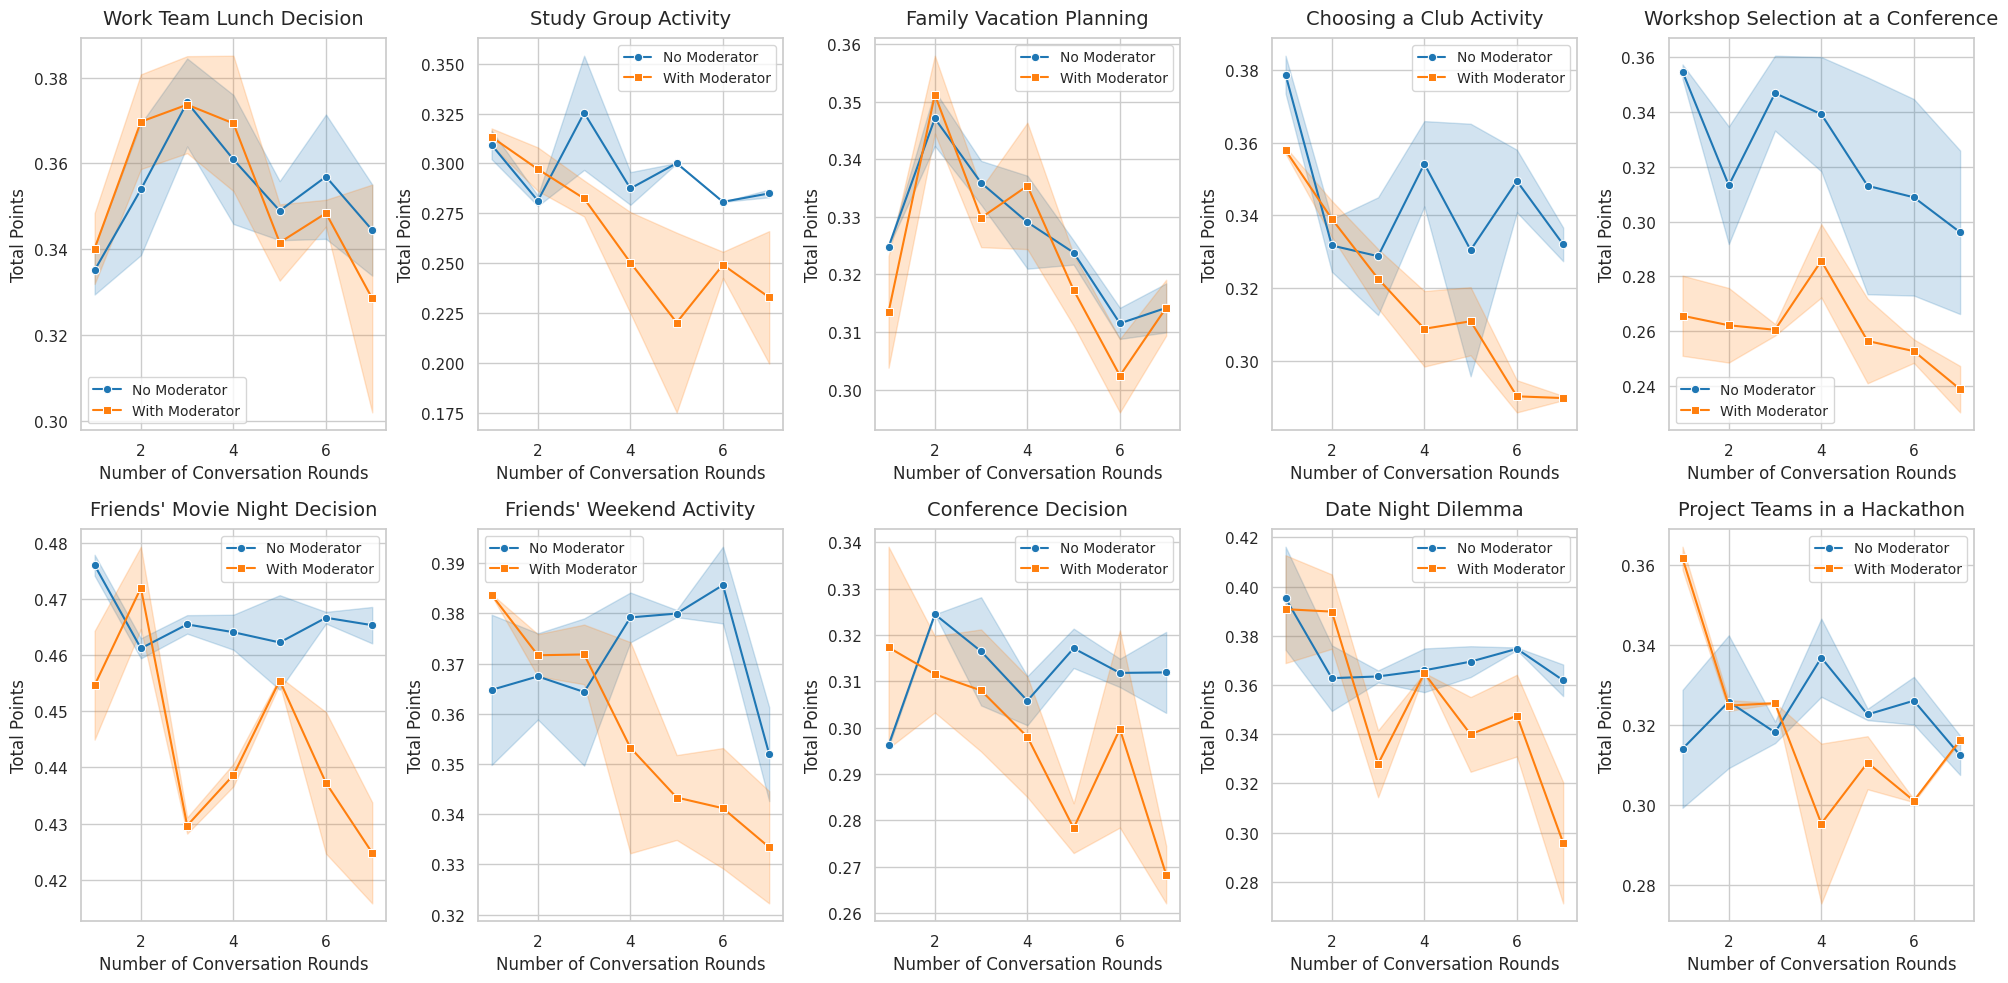

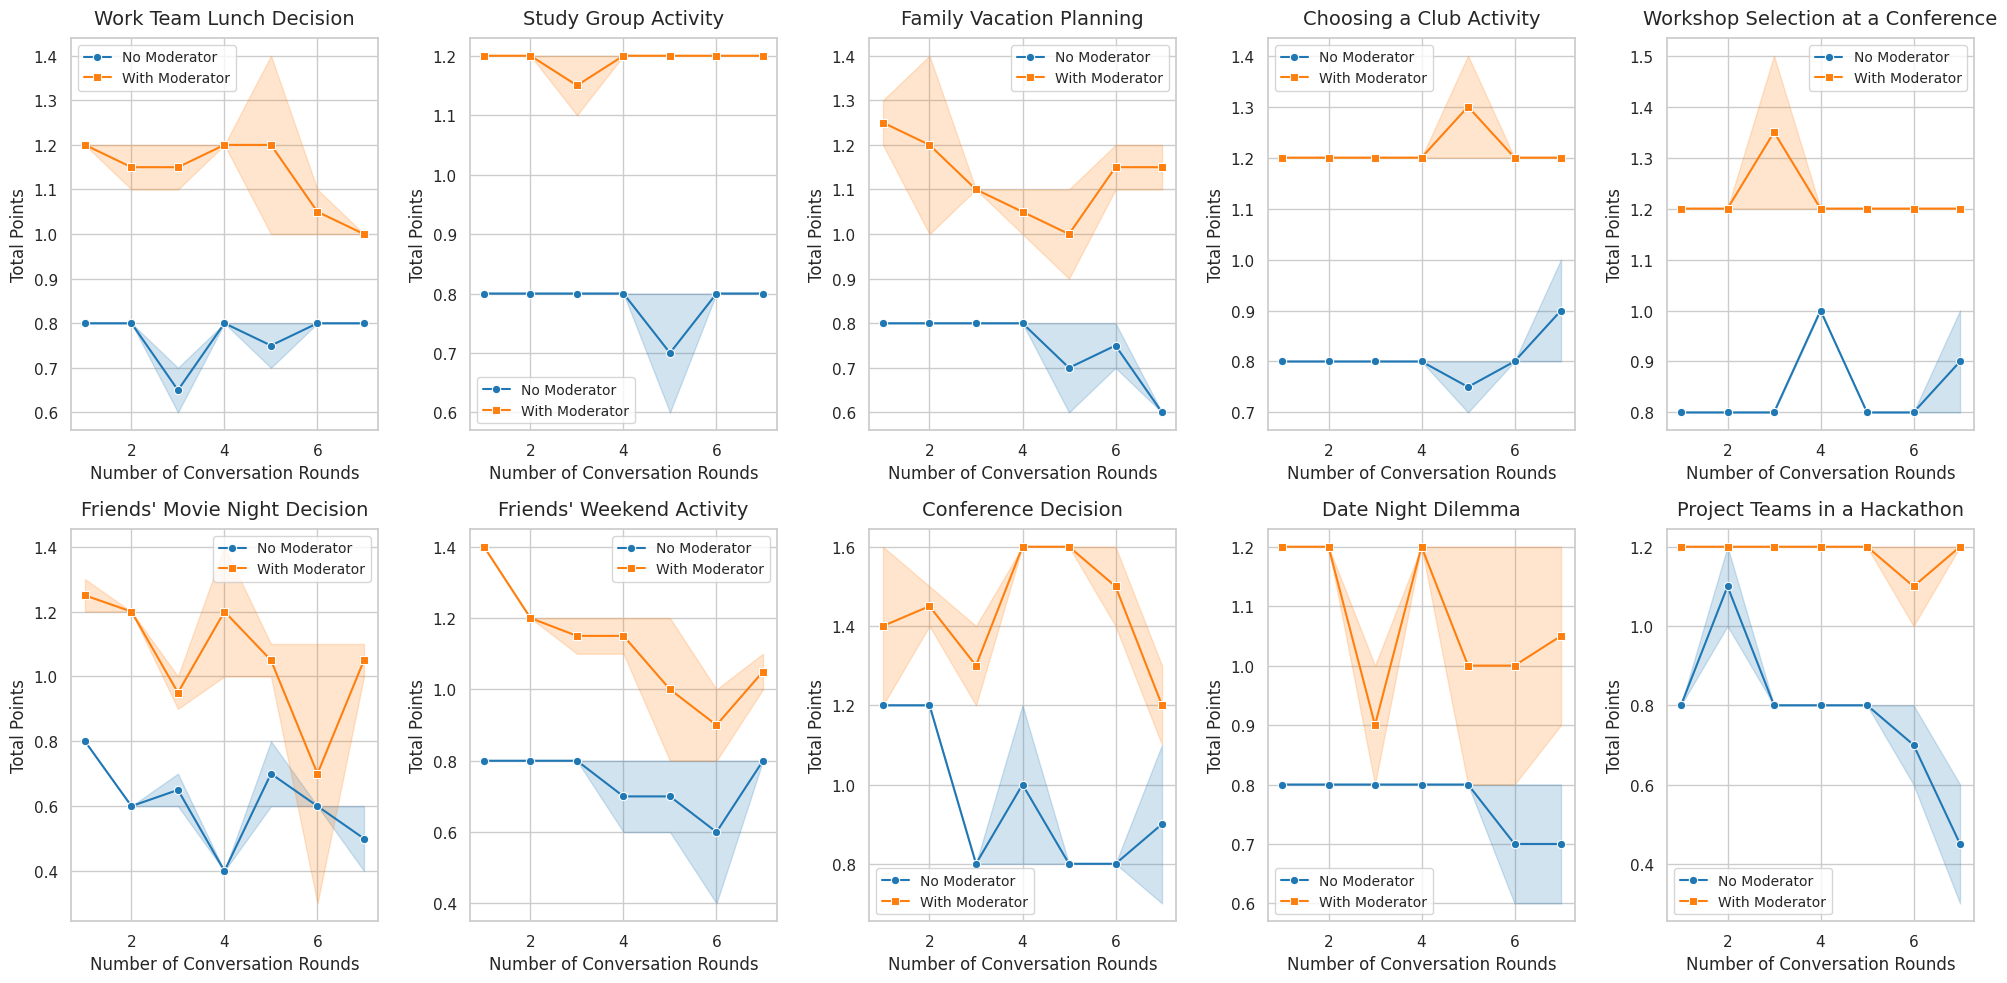

In [35]:
game_type = "Battle of the Sexes"
total_points = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
min_points = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
equality = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
quantitative = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
qualitative = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}


for game in game_dirs[game_type]:
    # print(game)
    
    max_points = 50
    min = 0
    idx = 0
    for num_conversation_rounds in [1, 2, 3, 4, 5, 6, 7]:
        for include_moderator in [False, True]:
            for i in range(2):
                # print(f'./logs_real_world/{game_type}/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
                df = pd.read_csv(f'./logs_real_world/{game_type}/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
        
                # Normalize points_A and points_B
                df['points_A'] = (df['points_A'] - min) / (max_points - min)
                df['points_B'] = (df['points_B'] - min) / (max_points - min)
                df['T_A'] = df['T_A']/10
                df['T_B'] = df['T_B']/10
                
                
                df['total_points'] = df['points_A'] + df['points_B']
                df['min_points'] = df[['points_A', 'points_B']].min(axis=1)
                df['quantitative'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B'])
                df['qualitative'] = 1*(df['T_A'] + df['T_B'])
                df['equality'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B']) + 1*(df['T_A'] + df['T_B'])
                total_points[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['total_points']
                min_points[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['min_points']
                quantitative[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['quantitative']
                qualitative[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['qualitative']
                equality[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['equality']
        idx += 1
                

for game in game_dirs[game_type]:
    quantitative_flat = quantitative[game].flatten()
    qualitative_flat = qualitative[game].flatten()
    
    correlation_matrix = np.corrcoef(quantitative_flat, qualitative_flat)
    correlation = correlation_matrix[0, 1]  # Get the correlation coefficient
    print("GAME: ", game)
    print("Correlation coefficient:", correlation)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.0)  # Adjust font scale if needed
custom_palette = ['#1f77b4', '#ff7f0e']

# Create a figure with subplots
num_games = len(game_dirs[game_type])  # Number of games to plot
num_cols = 5  # Number of subplots per row
num_rows = (num_games + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  # Adjust figsize

# Flatten axes array for easy iteration
axes = axes.flatten()

for ax, game in zip(axes, game_dirs[game_type]):
    # Create DataFrame for seaborn
    plot_data = []
    for idx, condition in enumerate(['No Moderator', 'With Moderator']):
        means = quantitative[game].mean(axis=-1)[:, idx]
        std_devs = quantitative[game].std(axis=-1)[:, idx]
        rounds = np.arange(1, len(means) + 1)
        
        for round_num, mean, std in zip(rounds, means, std_devs):
            plot_data.append({
                'Round': round_num,
                'Points': mean,
                'Std': std,
                'Condition': condition
            })
    
    df = pd.DataFrame(plot_data)
    
    # Create the line plot on the current axis
    sns.lineplot(
        data=df,
        x='Round',
        y='Points',
        hue='Condition',
        style='Condition',
        palette=custom_palette,
        markers=['o', 's'],
        dashes=False,
        ax=ax  # Specify the current axis
    )

    # Add colored error boundaries
    for condition in ['No Moderator', 'With Moderator']:
        condition_data = df[df['Condition'] == condition]
        ax.fill_between(
            condition_data['Round'],
            condition_data['Points'] - condition_data['Std'],
            condition_data['Points'] + condition_data['Std'],
            alpha=0.2,  # lighter transparency
            color=ax.get_lines()[['No Moderator', 'With Moderator'].index(condition)].get_color()
        )

    ax.set_title(game, fontsize=14, pad=10)  # Reduce title font size
    ax.set_xlabel('Number of Conversation Rounds', fontsize=12)  # Reduce label font size
    ax.set_ylabel('Total Points', fontsize=12)  # Reduce label font size
    ax.legend(title=None, frameon=True, fontsize=10)  # Reduce legend font size

# Hide any unused subplots
for i in range(num_games, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust space between subplots
# plt.savefig(f'plots/{game_type}_combined_plot.pdf')  # Save the combined plot as a PDF
plt.show()




import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.0)  # Adjust font scale if needed
custom_palette = ['#1f77b4', '#ff7f0e']

# Create a figure with subplots
num_games = len(game_dirs[game_type])  # Number of games to plot
num_cols = 5  # Number of subplots per row
num_rows = (num_games + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  # Adjust figsize

# Flatten axes array for easy iteration
axes = axes.flatten()

for ax, game in zip(axes, game_dirs[game_type]):
    # Create DataFrame for seaborn
    plot_data = []
    for idx, condition in enumerate(['No Moderator', 'With Moderator']):
        means = qualitative[game].mean(axis=-1)[:, idx]
        std_devs = qualitative[game].std(axis=-1)[:, idx]
        rounds = np.arange(1, len(means) + 1)
        
        for round_num, mean, std in zip(rounds, means, std_devs):
            plot_data.append({
                'Round': round_num,
                'Points': mean,
                'Std': std,
                'Condition': condition
            })
    
    df = pd.DataFrame(plot_data)
    
    # Create the line plot on the current axis
    sns.lineplot(
        data=df,
        x='Round',
        y='Points',
        hue='Condition',
        style='Condition',
        palette=custom_palette,
        markers=['o', 's'],
        dashes=False,
        ax=ax  # Specify the current axis
    )

    # Add colored error boundaries
    for condition in ['No Moderator', 'With Moderator']:
        condition_data = df[df['Condition'] == condition]
        ax.fill_between(
            condition_data['Round'],
            condition_data['Points'] - condition_data['Std'],
            condition_data['Points'] + condition_data['Std'],
            alpha=0.2,  # lighter transparency
            color=ax.get_lines()[['No Moderator', 'With Moderator'].index(condition)].get_color()
        )

    ax.set_title(game, fontsize=14, pad=10)  # Reduce title font size
    ax.set_xlabel('Number of Conversation Rounds', fontsize=12)  # Reduce label font size
    ax.set_ylabel('Total Points', fontsize=12)  # Reduce label font size
    ax.legend(title=None, frameon=True, fontsize=10)  # Reduce legend font size

# Hide any unused subplots
for i in range(num_games, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust space between subplots
# plt.savefig(f'plots/{game_type}_combined_plot.pdf')  # Save the combined plot as a PDF
plt.show()

GAME:  Online Content Collaboration
Correlation coefficient: 0.285874680627798
GAME:  Food Supply Chain
Correlation coefficient: 0.5930951826694779
GAME:  Startup Networking Events
Correlation coefficient: 0.7060988975987341
GAME:  Climate Change Mitigation
Correlation coefficient: 0.6614001340818048
GAME:  Academic Publishing
Correlation coefficient: 0.052331088617235885
GAME:  Local Community Projects
Correlation coefficient: 0.40451091709502557
GAME:  Humanitarian Aid Efforts
Correlation coefficient: 0.22730102780169942
GAME:  Open Source Software Development
Correlation coefficient: -0.08315674526656924
GAME:  Urban Transportation Planning
Correlation coefficient: 0.645371694548808
GAME:  Cross-Border Tourism Promotion
Correlation coefficient: 0.6435660070941184


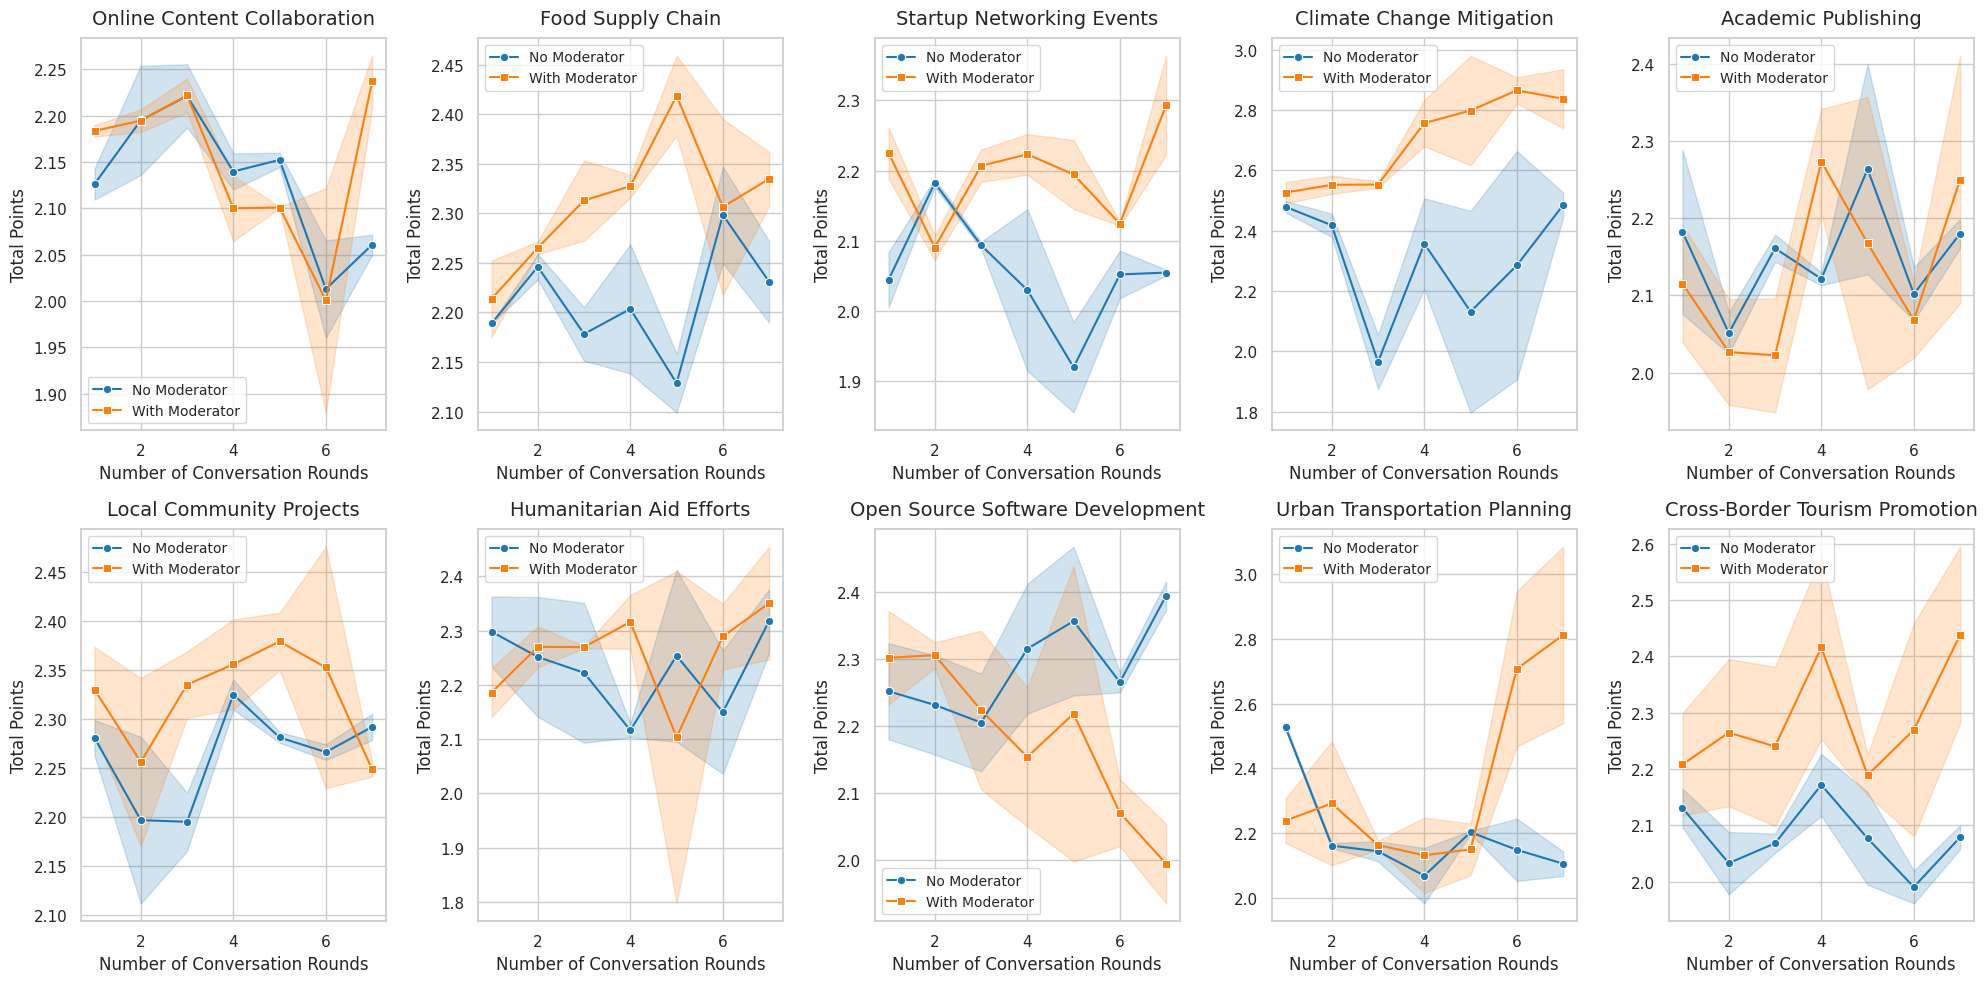

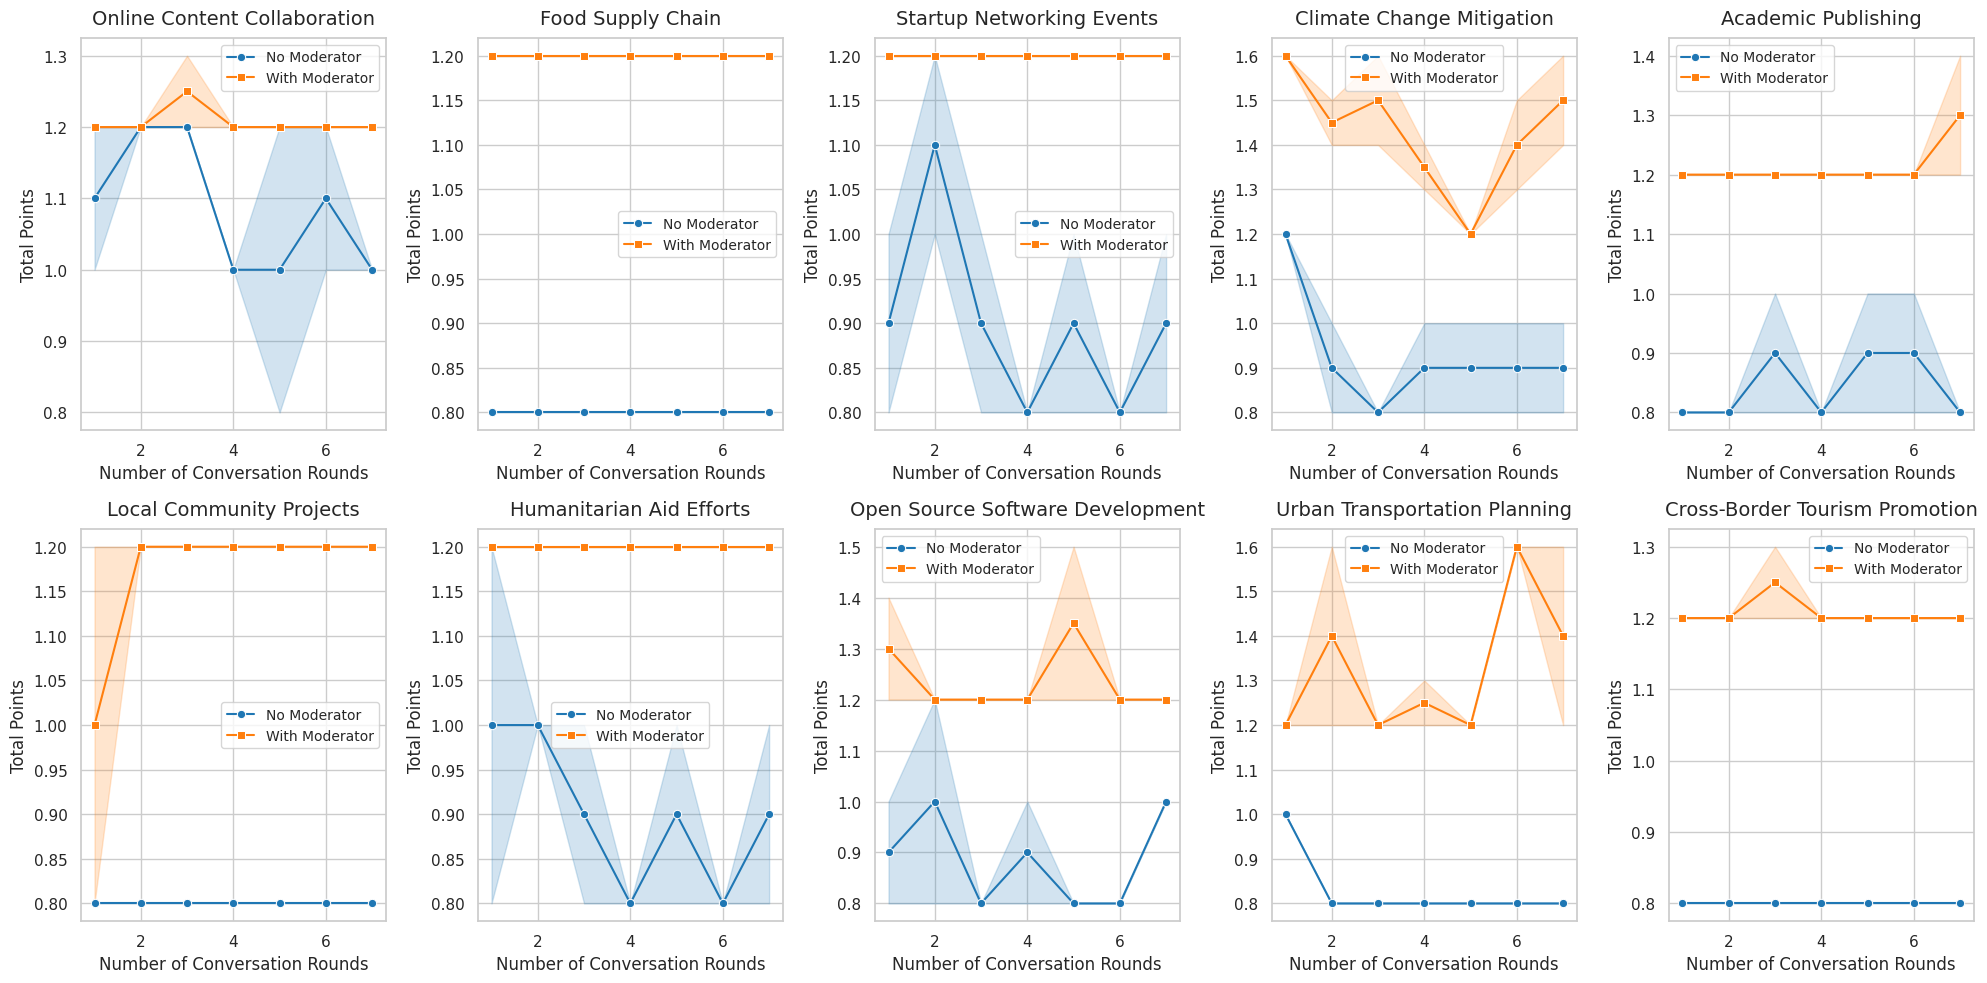

In [36]:
game_type = "Stag Hunt Game"
total_points = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
min_points = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
equality = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
quantitative = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
qualitative = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}


for game in game_dirs[game_type]:
    # print(game)
    
    max_points = 50
    min = 0
    idx = 0
    for num_conversation_rounds in [1, 2, 3, 4, 5, 6, 7]:
        for include_moderator in [False, True]:
            for i in range(2):
                # print(f'./logs_real_world/{game_type}/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
                df = pd.read_csv(f'./logs_real_world/{game_type}/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
        
                # Normalize points_A and points_B
                df['points_A'] = (df['points_A'] - min) / (max_points - min)
                df['points_B'] = (df['points_B'] - min) / (max_points - min)
                df['T_A'] = df['T_A']/10
                df['T_B'] = df['T_B']/10
                
                
                df['total_points'] = df['points_A'] + df['points_B']
                df['min_points'] = df[['points_A', 'points_B']].min(axis=1)
                df['quantitative'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B'])
                df['qualitative'] = 1*(df['T_A'] + df['T_B'])
                df['equality'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B']) + 1*(df['T_A'] + df['T_B'])
                total_points[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['total_points']
                min_points[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['min_points']
                quantitative[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['quantitative']
                qualitative[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['qualitative']
                equality[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['equality']
        idx += 1
                

for game in game_dirs[game_type]:
    quantitative_flat = quantitative[game].flatten()
    qualitative_flat = qualitative[game].flatten()
    
    correlation_matrix = np.corrcoef(quantitative_flat, qualitative_flat)
    correlation = correlation_matrix[0, 1]  # Get the correlation coefficient
    print("GAME: ", game)
    print("Correlation coefficient:", correlation)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.0)  # Adjust font scale if needed
custom_palette = ['#1f77b4', '#ff7f0e']

# Create a figure with subplots
num_games = len(game_dirs[game_type])  # Number of games to plot
num_cols = 5  # Number of subplots per row
num_rows = (num_games + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  # Adjust figsize

# Flatten axes array for easy iteration
axes = axes.flatten()

for ax, game in zip(axes, game_dirs[game_type]):
    # Create DataFrame for seaborn
    plot_data = []
    for idx, condition in enumerate(['No Moderator', 'With Moderator']):
        means = quantitative[game].mean(axis=-1)[:, idx]
        std_devs = quantitative[game].std(axis=-1)[:, idx]
        rounds = np.arange(1, len(means) + 1)
        
        for round_num, mean, std in zip(rounds, means, std_devs):
            plot_data.append({
                'Round': round_num,
                'Points': mean,
                'Std': std,
                'Condition': condition
            })
    
    df = pd.DataFrame(plot_data)
    
    # Create the line plot on the current axis
    sns.lineplot(
        data=df,
        x='Round',
        y='Points',
        hue='Condition',
        style='Condition',
        palette=custom_palette,
        markers=['o', 's'],
        dashes=False,
        ax=ax  # Specify the current axis
    )

    # Add colored error boundaries
    for condition in ['No Moderator', 'With Moderator']:
        condition_data = df[df['Condition'] == condition]
        ax.fill_between(
            condition_data['Round'],
            condition_data['Points'] - condition_data['Std'],
            condition_data['Points'] + condition_data['Std'],
            alpha=0.2,  # lighter transparency
            color=ax.get_lines()[['No Moderator', 'With Moderator'].index(condition)].get_color()
        )

    ax.set_title(game, fontsize=14, pad=10)  # Reduce title font size
    ax.set_xlabel('Number of Conversation Rounds', fontsize=12)  # Reduce label font size
    ax.set_ylabel('Total Points', fontsize=12)  # Reduce label font size
    ax.legend(title=None, frameon=True, fontsize=10)  # Reduce legend font size

# Hide any unused subplots
for i in range(num_games, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust space between subplots
# plt.savefig(f'plots/{game_type}_combined_plot.pdf')  # Save the combined plot as a PDF
plt.show()




import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.0)  # Adjust font scale if needed
custom_palette = ['#1f77b4', '#ff7f0e']

# Create a figure with subplots
num_games = len(game_dirs[game_type])  # Number of games to plot
num_cols = 5  # Number of subplots per row
num_rows = (num_games + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  # Adjust figsize

# Flatten axes array for easy iteration
axes = axes.flatten()

for ax, game in zip(axes, game_dirs[game_type]):
    # Create DataFrame for seaborn
    plot_data = []
    for idx, condition in enumerate(['No Moderator', 'With Moderator']):
        means = qualitative[game].mean(axis=-1)[:, idx]
        std_devs = qualitative[game].std(axis=-1)[:, idx]
        rounds = np.arange(1, len(means) + 1)
        
        for round_num, mean, std in zip(rounds, means, std_devs):
            plot_data.append({
                'Round': round_num,
                'Points': mean,
                'Std': std,
                'Condition': condition
            })
    
    df = pd.DataFrame(plot_data)
    
    # Create the line plot on the current axis
    sns.lineplot(
        data=df,
        x='Round',
        y='Points',
        hue='Condition',
        style='Condition',
        palette=custom_palette,
        markers=['o', 's'],
        dashes=False,
        ax=ax  # Specify the current axis
    )

    # Add colored error boundaries
    for condition in ['No Moderator', 'With Moderator']:
        condition_data = df[df['Condition'] == condition]
        ax.fill_between(
            condition_data['Round'],
            condition_data['Points'] - condition_data['Std'],
            condition_data['Points'] + condition_data['Std'],
            alpha=0.2,  # lighter transparency
            color=ax.get_lines()[['No Moderator', 'With Moderator'].index(condition)].get_color()
        )

    ax.set_title(game, fontsize=14, pad=10)  # Reduce title font size
    ax.set_xlabel('Number of Conversation Rounds', fontsize=12)  # Reduce label font size
    ax.set_ylabel('Total Points', fontsize=12)  # Reduce label font size
    ax.legend(title=None, frameon=True, fontsize=10)  # Reduce legend font size

# Hide any unused subplots
for i in range(num_games, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust space between subplots
# plt.savefig(f'plots/{game_type}_combined_plot.pdf')  # Save the combined plot as a PDF
plt.show()

GAME:  Nuclear Disarmament Agreement
Correlation coefficient: 0.29577412987826845
GAME:  Technology Patent Sharing
Correlation coefficient: 0.2820308842738734
GAME:  Antitrust Agreement in Oligopoly
Correlation coefficient: 0.5593418183139759
GAME:  Ceasefire Agreement Between Warring Factions
Correlation coefficient: 0.4566897708349383
GAME:  International Trade Agreement
Correlation coefficient: 0.10538570966965836
GAME:  Public Health Initiatives
Correlation coefficient: 0.2757514322391521
GAME:  Space Exploration Collaboration
Correlation coefficient: 0.19019647879638393
GAME:  Fisheries Management
Correlation coefficient: 0.5680232166702057
GAME:  Global Warming Mitigation
Correlation coefficient: 0.60088385835911
GAME:  Corporate Merger Negotiation
Correlation coefficient: -0.36101894756870867


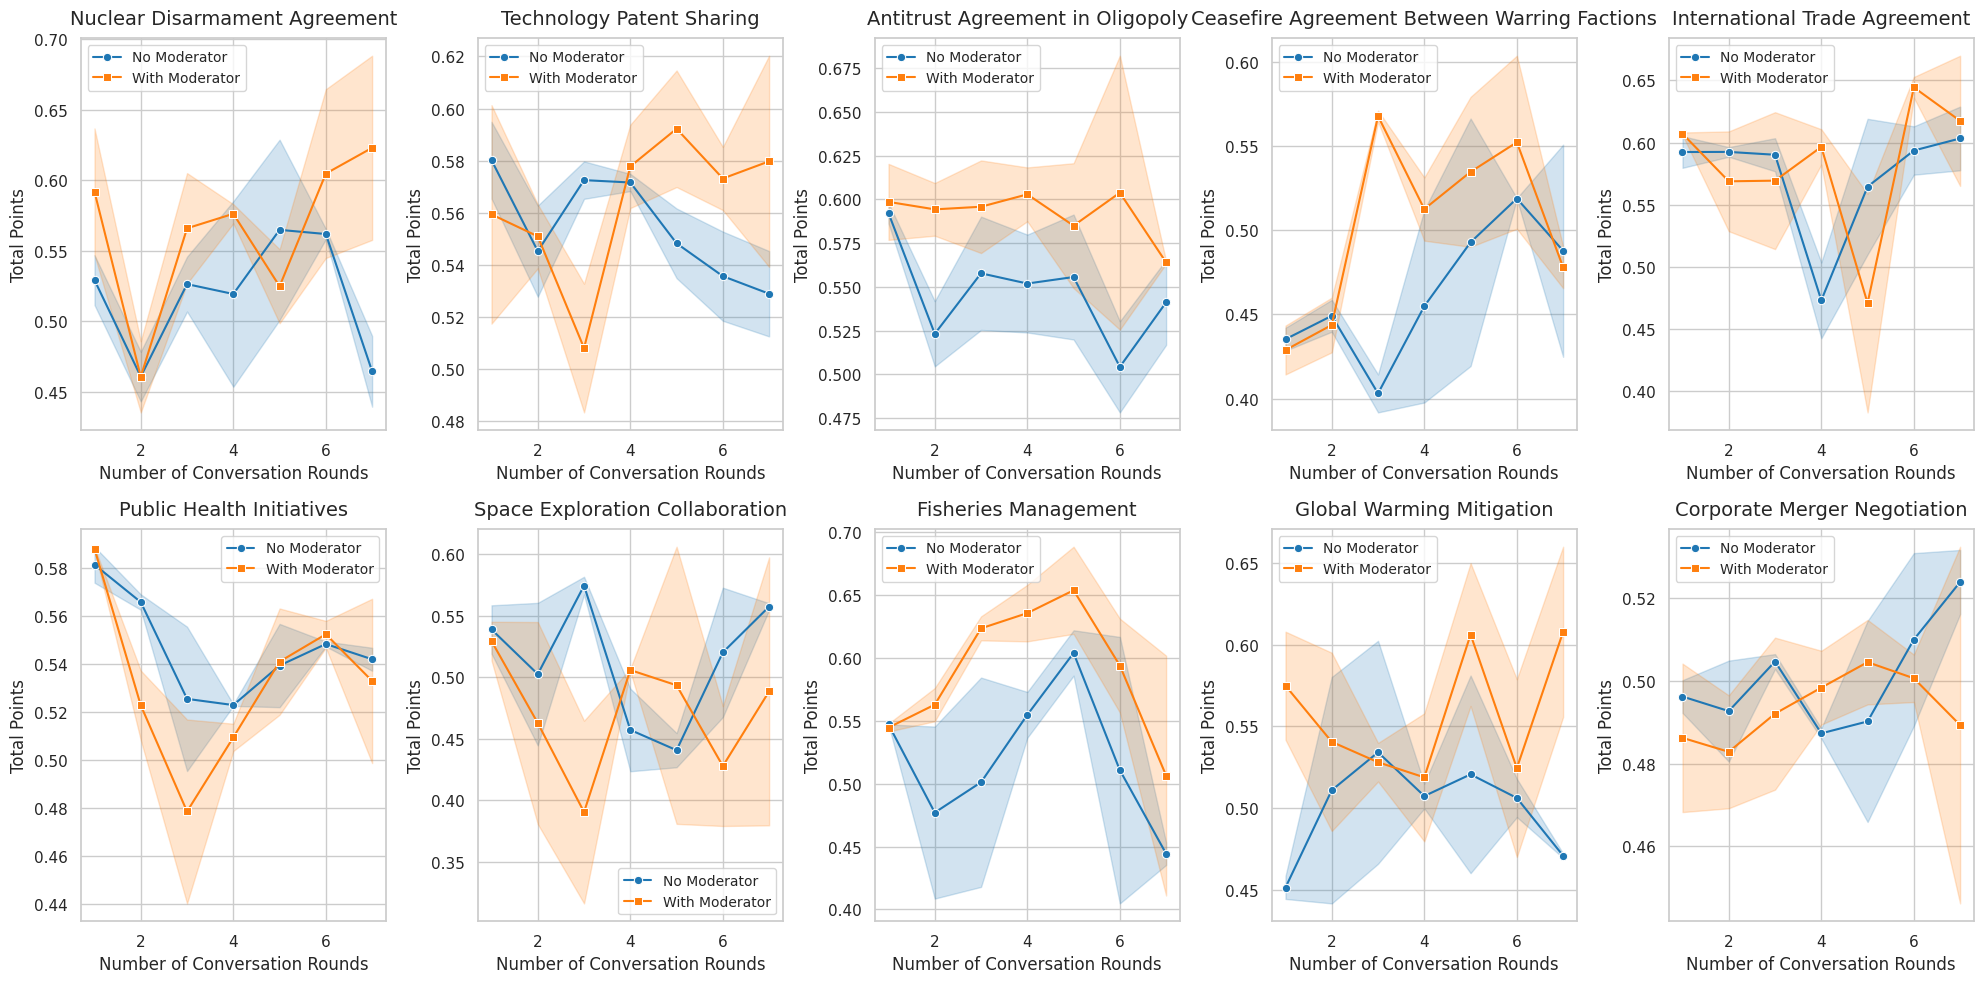

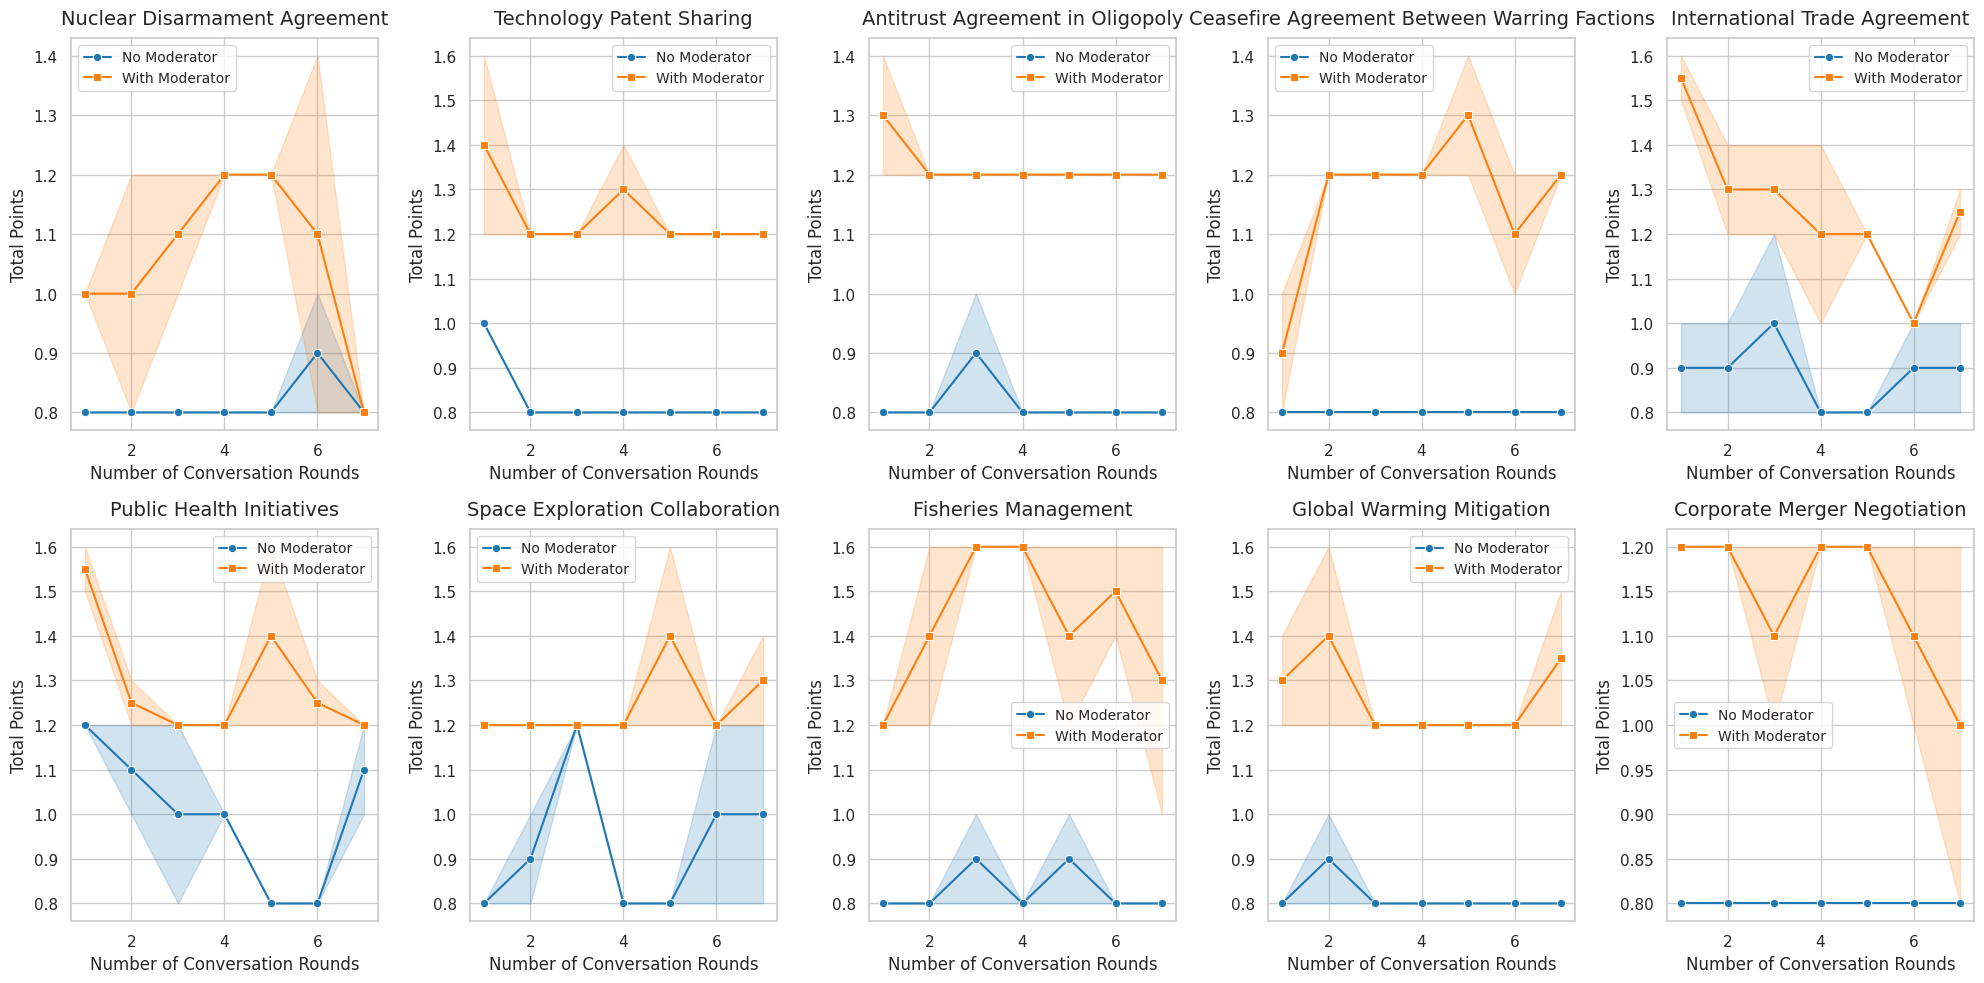

In [37]:
game_type = "Deadlock Game"
total_points = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
min_points = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
equality = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
quantitative = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
qualitative = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}


for game in game_dirs[game_type]:
    # print(game)
    
    max_points = 50
    min = 0
    idx = 0
    for num_conversation_rounds in [1, 2, 3, 4, 5, 6, 7]:
        for include_moderator in [False, True]:
            for i in range(2):
                # print(f'./logs_real_world/{game_type}/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
                df = pd.read_csv(f'./logs_real_world/{game_type}/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
        
                # Normalize points_A and points_B
                df['points_A'] = (df['points_A'] - min) / (max_points - min)
                df['points_B'] = (df['points_B'] - min) / (max_points - min)
                df['T_A'] = df['T_A']/10
                df['T_B'] = df['T_B']/10
                
                
                df['total_points'] = df['points_A'] + df['points_B']
                df['min_points'] = df[['points_A', 'points_B']].min(axis=1)
                df['quantitative'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B'])
                df['qualitative'] = 1*(df['T_A'] + df['T_B'])
                df['equality'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B']) + 1*(df['T_A'] + df['T_B'])
                total_points[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['total_points']
                min_points[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['min_points']
                quantitative[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['quantitative']
                qualitative[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['qualitative']
                equality[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['equality']
        idx += 1
                

for game in game_dirs[game_type]:
    quantitative_flat = quantitative[game].flatten()
    qualitative_flat = qualitative[game].flatten()
    
    correlation_matrix = np.corrcoef(quantitative_flat, qualitative_flat)
    correlation = correlation_matrix[0, 1]  # Get the correlation coefficient
    print("GAME: ", game)
    print("Correlation coefficient:", correlation)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.0)  # Adjust font scale if needed
custom_palette = ['#1f77b4', '#ff7f0e']

# Create a figure with subplots
num_games = len(game_dirs[game_type])  # Number of games to plot
num_cols = 5  # Number of subplots per row
num_rows = (num_games + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  # Adjust figsize

# Flatten axes array for easy iteration
axes = axes.flatten()

for ax, game in zip(axes, game_dirs[game_type]):
    # Create DataFrame for seaborn
    plot_data = []
    for idx, condition in enumerate(['No Moderator', 'With Moderator']):
        means = quantitative[game].mean(axis=-1)[:, idx]
        std_devs = quantitative[game].std(axis=-1)[:, idx]
        rounds = np.arange(1, len(means) + 1)
        
        for round_num, mean, std in zip(rounds, means, std_devs):
            plot_data.append({
                'Round': round_num,
                'Points': mean,
                'Std': std,
                'Condition': condition
            })
    
    df = pd.DataFrame(plot_data)
    
    # Create the line plot on the current axis
    sns.lineplot(
        data=df,
        x='Round',
        y='Points',
        hue='Condition',
        style='Condition',
        palette=custom_palette,
        markers=['o', 's'],
        dashes=False,
        ax=ax  # Specify the current axis
    )

    # Add colored error boundaries
    for condition in ['No Moderator', 'With Moderator']:
        condition_data = df[df['Condition'] == condition]
        ax.fill_between(
            condition_data['Round'],
            condition_data['Points'] - condition_data['Std'],
            condition_data['Points'] + condition_data['Std'],
            alpha=0.2,  # lighter transparency
            color=ax.get_lines()[['No Moderator', 'With Moderator'].index(condition)].get_color()
        )

    ax.set_title(game, fontsize=14, pad=10)  # Reduce title font size
    ax.set_xlabel('Number of Conversation Rounds', fontsize=12)  # Reduce label font size
    ax.set_ylabel('Total Points', fontsize=12)  # Reduce label font size
    ax.legend(title=None, frameon=True, fontsize=10)  # Reduce legend font size

# Hide any unused subplots
for i in range(num_games, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust space between subplots
# plt.savefig(f'plots/{game_type}_combined_plot.pdf')  # Save the combined plot as a PDF
plt.show()




import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.0)  # Adjust font scale if needed
custom_palette = ['#1f77b4', '#ff7f0e']

# Create a figure with subplots
num_games = len(game_dirs[game_type])  # Number of games to plot
num_cols = 5  # Number of subplots per row
num_rows = (num_games + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  # Adjust figsize

# Flatten axes array for easy iteration
axes = axes.flatten()

for ax, game in zip(axes, game_dirs[game_type]):
    # Create DataFrame for seaborn
    plot_data = []
    for idx, condition in enumerate(['No Moderator', 'With Moderator']):
        means = qualitative[game].mean(axis=-1)[:, idx]
        std_devs = qualitative[game].std(axis=-1)[:, idx]
        rounds = np.arange(1, len(means) + 1)
        
        for round_num, mean, std in zip(rounds, means, std_devs):
            plot_data.append({
                'Round': round_num,
                'Points': mean,
                'Std': std,
                'Condition': condition
            })
    
    df = pd.DataFrame(plot_data)
    
    # Create the line plot on the current axis
    sns.lineplot(
        data=df,
        x='Round',
        y='Points',
        hue='Condition',
        style='Condition',
        palette=custom_palette,
        markers=['o', 's'],
        dashes=False,
        ax=ax  # Specify the current axis
    )

    # Add colored error boundaries
    for condition in ['No Moderator', 'With Moderator']:
        condition_data = df[df['Condition'] == condition]
        ax.fill_between(
            condition_data['Round'],
            condition_data['Points'] - condition_data['Std'],
            condition_data['Points'] + condition_data['Std'],
            alpha=0.2,  # lighter transparency
            color=ax.get_lines()[['No Moderator', 'With Moderator'].index(condition)].get_color()
        )

    ax.set_title(game, fontsize=14, pad=10)  # Reduce title font size
    ax.set_xlabel('Number of Conversation Rounds', fontsize=12)  # Reduce label font size
    ax.set_ylabel('Total Points', fontsize=12)  # Reduce label font size
    ax.legend(title=None, frameon=True, fontsize=10)  # Reduce legend font size

# Hide any unused subplots
for i in range(num_games, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust space between subplots
# plt.savefig(f'plots/{game_type}_combined_plot.pdf')  # Save the combined plot as a PDF
plt.show()

GAME:  Company Patent Disputes
Correlation coefficient: 0.337547958499952
GAME:  Traffic Lane Merging
Correlation coefficient: 0.631171080393052
GAME:  Farmland Water Access
Correlation coefficient: -0.17365526898182662
GAME:  Corporate Talent Recruitment
Correlation coefficient: 0.6363384331520766
GAME:  Neighborhood Parking Spot Allocation
Correlation coefficient: 0.8026344442995987
GAME:  Office Resource Allocation
Correlation coefficient: 0.586707170589507
GAME:  Open-Source Software Contributions
Correlation coefficient: 0.4248086503167088
GAME:  Political Campaign Strategies
Correlation coefficient: 0.5008705265299503
GAME:  Public Park Usage
Correlation coefficient: -0.20812357961356506
GAME:  Urban Bicycle Sharing Programs
Correlation coefficient: 0.624410460758052


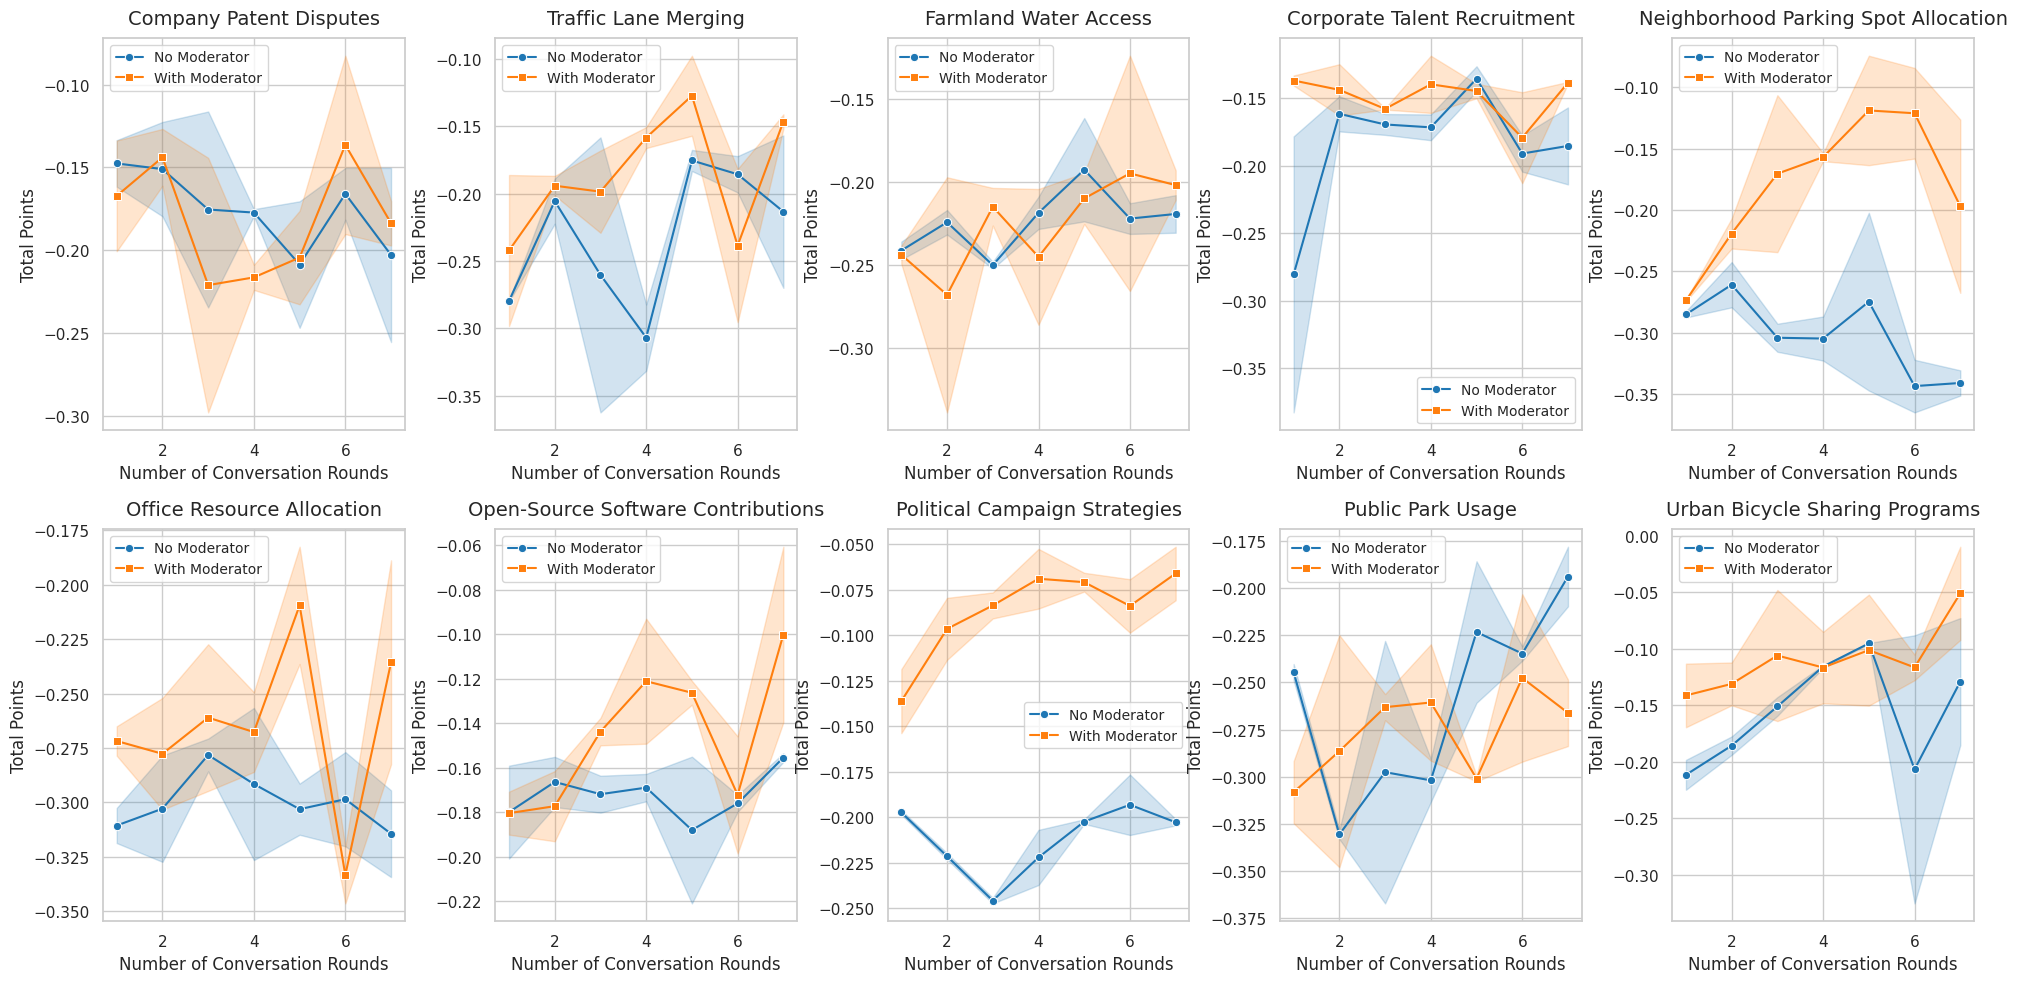

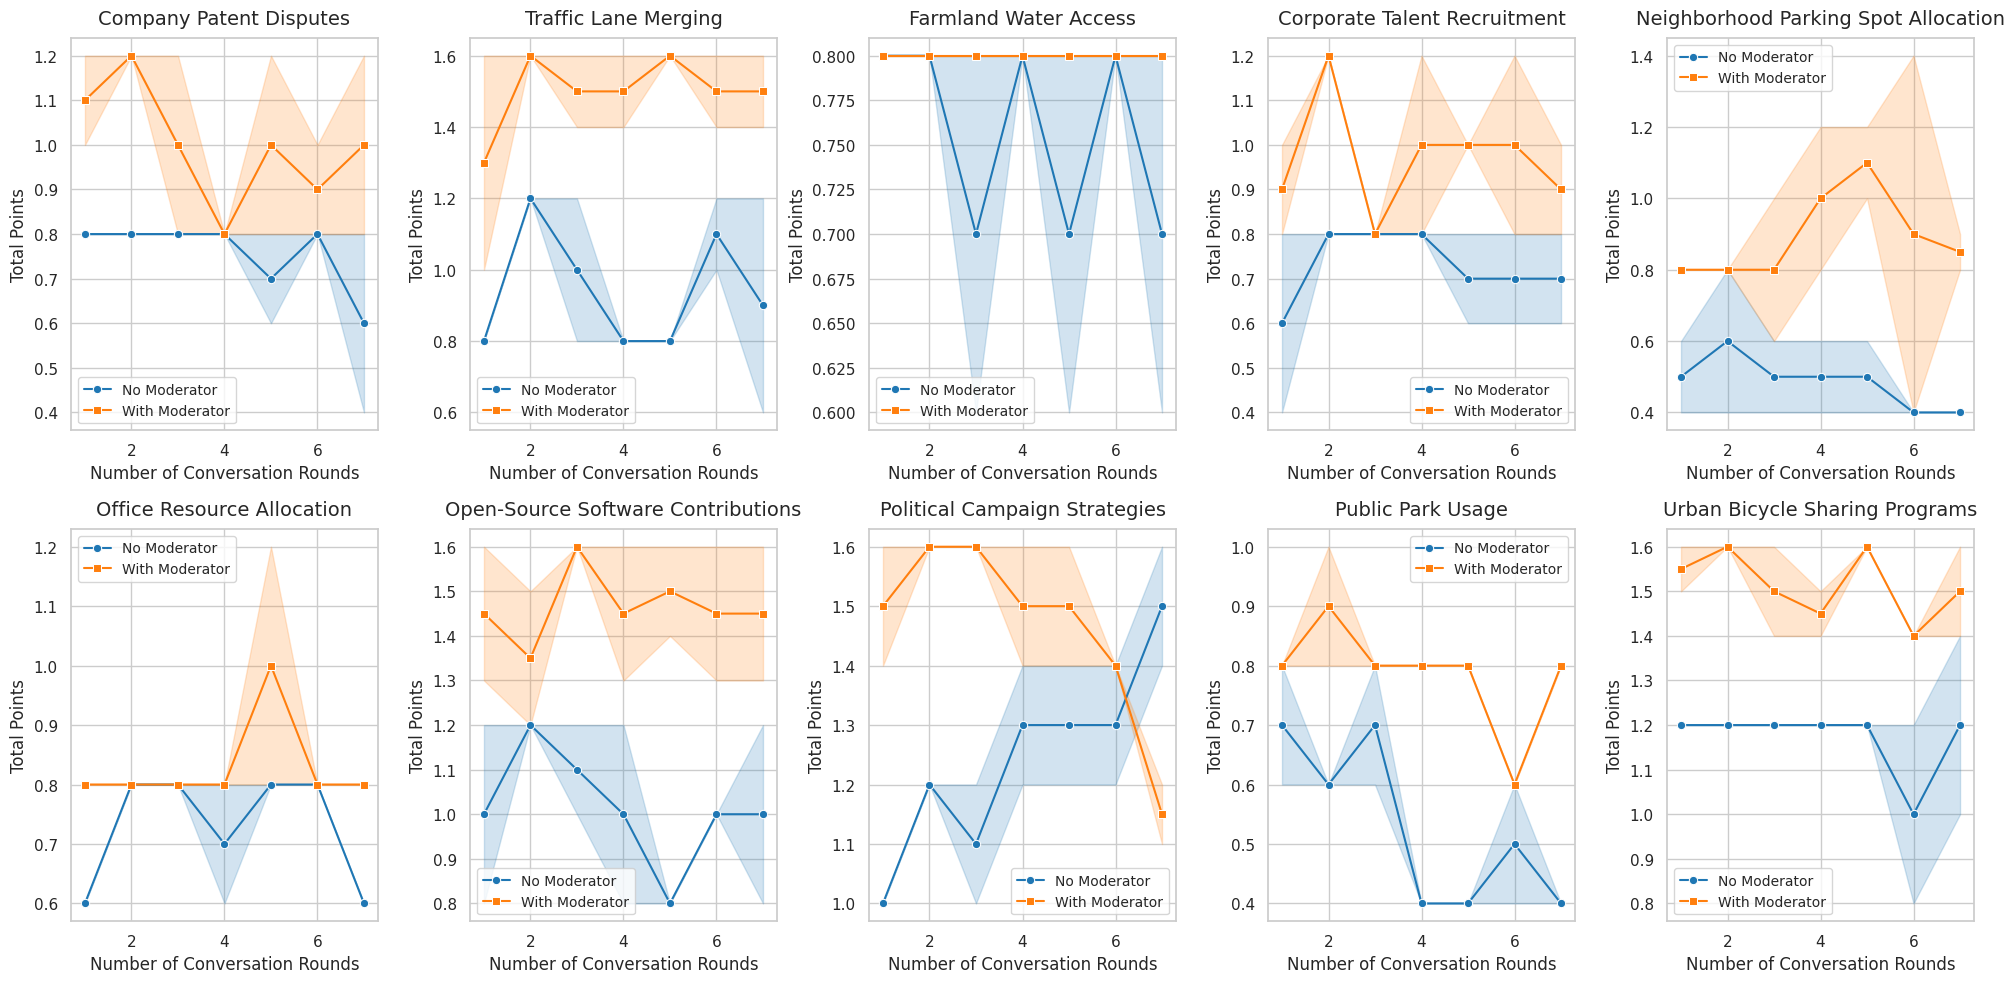

In [38]:
game_type = "Hawk-Dove Game"
total_points = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
min_points = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
equality = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
quantitative = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}
qualitative = {game: np.zeros((7, 2, 2)) for game in game_dirs[game_type]}


for game in game_dirs[game_type]:
    # print(game)
    
    max_points = 50
    min = 0
    idx = 0
    for num_conversation_rounds in [1, 2, 3, 4, 5, 6, 7]:
        for include_moderator in [False, True]:
            for i in range(2):
                # print(f'./logs_real_world/{game_type}/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
                df = pd.read_csv(f'./logs_real_world/{game_type}/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
        
                # Normalize points_A and points_B
                df['points_A'] = (df['points_A'] - min) / (max_points - min)
                df['points_B'] = (df['points_B'] - min) / (max_points - min)
                df['T_A'] = df['T_A']/10
                df['T_B'] = df['T_B']/10
                
                
                df['total_points'] = df['points_A'] + df['points_B']
                df['min_points'] = df[['points_A', 'points_B']].min(axis=1)
                df['quantitative'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B'])
                df['qualitative'] = 1*(df['T_A'] + df['T_B'])
                df['equality'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B']) + 1*(df['T_A'] + df['T_B'])
                total_points[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['total_points']
                min_points[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['min_points']
                quantitative[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['quantitative']
                qualitative[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['qualitative']
                equality[str(game)][idx][int(include_moderator)][i] = df.iloc[-1]['equality']
        idx += 1
                

for game in game_dirs[game_type]:
    quantitative_flat = quantitative[game].flatten()
    qualitative_flat = qualitative[game].flatten()
    
    correlation_matrix = np.corrcoef(quantitative_flat, qualitative_flat)
    correlation = correlation_matrix[0, 1]  # Get the correlation coefficient
    print("GAME: ", game)
    print("Correlation coefficient:", correlation)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.0)  # Adjust font scale if needed
custom_palette = ['#1f77b4', '#ff7f0e']

# Create a figure with subplots
num_games = len(game_dirs[game_type])  # Number of games to plot
num_cols = 5  # Number of subplots per row
num_rows = (num_games + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  # Adjust figsize

# Flatten axes array for easy iteration
axes = axes.flatten()

for ax, game in zip(axes, game_dirs[game_type]):
    # Create DataFrame for seaborn
    plot_data = []
    for idx, condition in enumerate(['No Moderator', 'With Moderator']):
        means = quantitative[game].mean(axis=-1)[:, idx]
        std_devs = quantitative[game].std(axis=-1)[:, idx]
        rounds = np.arange(1, len(means) + 1)
        
        for round_num, mean, std in zip(rounds, means, std_devs):
            plot_data.append({
                'Round': round_num,
                'Points': mean,
                'Std': std,
                'Condition': condition
            })
    
    df = pd.DataFrame(plot_data)
    
    # Create the line plot on the current axis
    sns.lineplot(
        data=df,
        x='Round',
        y='Points',
        hue='Condition',
        style='Condition',
        palette=custom_palette,
        markers=['o', 's'],
        dashes=False,
        ax=ax  # Specify the current axis
    )

    # Add colored error boundaries
    for condition in ['No Moderator', 'With Moderator']:
        condition_data = df[df['Condition'] == condition]
        ax.fill_between(
            condition_data['Round'],
            condition_data['Points'] - condition_data['Std'],
            condition_data['Points'] + condition_data['Std'],
            alpha=0.2,  # lighter transparency
            color=ax.get_lines()[['No Moderator', 'With Moderator'].index(condition)].get_color()
        )

    ax.set_title(game, fontsize=14, pad=10)  # Reduce title font size
    ax.set_xlabel('Number of Conversation Rounds', fontsize=12)  # Reduce label font size
    ax.set_ylabel('Total Points', fontsize=12)  # Reduce label font size
    ax.legend(title=None, frameon=True, fontsize=10)  # Reduce legend font size

# Hide any unused subplots
for i in range(num_games, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust space between subplots
# plt.savefig(f'plots/{game_type}_combined_plot.pdf')  # Save the combined plot as a PDF
plt.show()




import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.0)  # Adjust font scale if needed
custom_palette = ['#1f77b4', '#ff7f0e']

# Create a figure with subplots
num_games = len(game_dirs[game_type])  # Number of games to plot
num_cols = 5  # Number of subplots per row
num_rows = (num_games + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  # Adjust figsize

# Flatten axes array for easy iteration
axes = axes.flatten()

for ax, game in zip(axes, game_dirs[game_type]):
    # Create DataFrame for seaborn
    plot_data = []
    for idx, condition in enumerate(['No Moderator', 'With Moderator']):
        means = qualitative[game].mean(axis=-1)[:, idx]
        std_devs = qualitative[game].std(axis=-1)[:, idx]
        rounds = np.arange(1, len(means) + 1)
        
        for round_num, mean, std in zip(rounds, means, std_devs):
            plot_data.append({
                'Round': round_num,
                'Points': mean,
                'Std': std,
                'Condition': condition
            })
    
    df = pd.DataFrame(plot_data)
    
    # Create the line plot on the current axis
    sns.lineplot(
        data=df,
        x='Round',
        y='Points',
        hue='Condition',
        style='Condition',
        palette=custom_palette,
        markers=['o', 's'],
        dashes=False,
        ax=ax  # Specify the current axis
    )

    # Add colored error boundaries
    for condition in ['No Moderator', 'With Moderator']:
        condition_data = df[df['Condition'] == condition]
        ax.fill_between(
            condition_data['Round'],
            condition_data['Points'] - condition_data['Std'],
            condition_data['Points'] + condition_data['Std'],
            alpha=0.2,  # lighter transparency
            color=ax.get_lines()[['No Moderator', 'With Moderator'].index(condition)].get_color()
        )

    ax.set_title(game, fontsize=14, pad=10)  # Reduce title font size
    ax.set_xlabel('Number of Conversation Rounds', fontsize=12)  # Reduce label font size
    ax.set_ylabel('Total Points', fontsize=12)  # Reduce label font size
    ax.legend(title=None, frameon=True, fontsize=10)  # Reduce legend font size

# Hide any unused subplots
for i in range(num_games, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust space between subplots
# plt.savefig(f'plots/{game_type}_combined_plot.pdf')  # Save the combined plot as a PDF
plt.show()